In [1]:
import sys
sys.path.append('C:/Users/GJ/PycharmProjects/2022SPCUP')



import import_ipynb
import class_new
import importlib
importlib.reload(class_new)

C:\Users\GJ\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


<module 'class_new' from 'C:/Users/GJ/PycharmProjects/2022SPCUP\\class_new.py'>

In [2]:
from class_new import *
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

In [24]:



# from class_new import *
# import tensorflow as tf
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score



known_volume_path = './part2_full_train_4X5000'
unknown_volume_path = './unseen_noisy_4X1000'



rs = 42
known_path, known_labels = part2_file_path_list(known_volume_path, True)
unknown_path, unknown_labels = part2_file_path_list(unknown_volume_path, False)
##train set
# print('raw train_set_num :',len(labels))
X_train_path, X_test_path, y_train_raw, y_test_raw = train_test_split(np.array(known_path),
                                                                      known_labels, test_size=0.2,
                                                                      stratify = known_labels, random_state=rs)

n = 100
n_mels = 64
# train = data(X_train_path,y_train_raw,n_mels=n_mels, known = True)

# test = data(X_test_path,y_test_raw, n_mels=n_mels, known = True)

unseen =data(unknown_path,unknown_labels, n_mels=n_mels, known = False)

# train = data(X_train_path[:n],y_train_raw[:n],n_mels=n_mels, known = True)

# test = data(X_test_path[:n],y_test_raw[:n], n_mels=n_mels, known = True)

# unseen = data(unknown_path[:n],unknown_labels[:n], n_mels=n_mels, known = False)



In [25]:
unseen.extract_mel()
unseen.reshape_data()

X_train.shape :  (25220, 64, 32, 1)


In [3]:

for i in [unseen,train, test]:
    i.extract_mel()
    i.reshape_data()


from tensorflow.keras.models import load_model
model_vec = load_model('./best_model_noise/42_spcup_best.h5')

from scipy.stats import mode



X_train.shape :  (18942, 64, 32, 1)
X_train.shape :  (104108, 64, 32, 1)
y_train.shape (104108, 5)
X_train.shape :  (25518, 64, 32, 1)
y_train.shape (25518, 5)


In [17]:
import pickle
# with open('part2_train.p','wb') as f:
#     pickle.dump(train,f)
# with open('part2_test.p','wb') as f:
#     pickle.dump(test,f)
# with open('part2_unseen3000.p','wb') as f:
#     pickle.dump(unseen,f)


with open("./part2_data_pkl/part2_train.p", 'rb') as f:
    train = pickle.load(f)
with open("./part2_data_pkl/part2_test.p", 'rb') as f:
    test = pickle.load(f)
with open("./part2_data_pkl/part2_unseen3000.p", 'rb') as f:
    unseen = pickle.load(f)

In [26]:
from tensorflow.keras.models import load_model
model = load_model('./best_model_noise/10_part2_label6_spcup_save_last.h5')
# model = load_model('./models_log/40_42_spcup_best_model_act_split.h5')

model_vec = load_model('./best_model_noise/10_part2_label6_spcup_save_last.h5')

model_vec.pop()
model_vec.compile()
model_vec.summary()



def ext_soft(data,model, model_vec, n_round = 5):
    

    
    prediction_soft = model.predict(data.X_reshaped)
    prediction_vec = model_vec.predict(data.X_reshaped)
    predicted_classes = np.argmax(prediction_soft, axis=1)
    

    
    f = 0
    softmax_val = []
    test_predict = []

    for j,i in enumerate(data.file_split_num):
        mean_vec = np.mean(prediction_vec[f:f + i],axis = 0)    
        mean_soft = np.mean(prediction_soft[f:f + i],axis = 0) 
#         mean_soft = np.mean(prediction[f:f + i],axis = 0)
#         mean_soft = np.mean(np.power(prediction[f:f + i],2),axis = 0)
        
        softmax_val.append(np.round(mean_vec,n_round))
#         test_predict.append(mode(predicted_classes[f:f + i])[0][0])
        test_predict.append(np.argmax(mean_soft))
        
#         predicted_classes = np.argmax(np.mean(np.power(prediction[f:f + i],1),axis = 0))
#         test_predict.append(predicted_classes)
        f += i
    return np.array(softmax_val), np.array(test_predict)


test_soft, test_predict = ext_soft(test,model, model_vec)
unseen_soft, unseen_predict = ext_soft(unseen, model, model_vec)
train_soft, train_predict = ext_soft(train, model, model_vec)
# split_soft = model.predict(train.X_reshaped, model, model_vec)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 64, 32, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 32, 16)        416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 32, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 32, 32)        12832     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 32, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 6, 64)         0

(4000, 6)

In [39]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test_raw, test_predict)
print('\n\n', cf)

#round 5로 했을 때 최고

# scaler = RobustScaler()

scaler = StandardScaler()

test_sc = scaler.fit_transform(test_soft)
unseen_sc = scaler.fit_transform(unseen_soft)
train_sc = scaler.fit_transform(train_soft)
# split_sc = scaler.fit_transform(split_soft)


print(train_soft.shape)
print(test_soft.shape)
print(unseen_soft.shape)

# print(split_soft.shape)

print(test_sc[:3])
print(train_sc[:3])
print(unseen_sc[:3])



 [[800   0   0   0   0]
 [  0 798   2   0   0]
 [  0   4 796   0   0]
 [  0   0   0 800   0]
 [  0   0   0   0 800]]
(16000, 6)
(4000, 6)
(4000, 6)
[[-0.89220566  1.5313274   0.31551582  0.1500145  -0.8989148  -0.40121368]
 [-0.61601985  0.42739445 -0.9834349   1.4573708  -0.5172859  -0.89682657]
 [-0.5729493   0.5123079   1.402689    0.0732011  -0.7610766  -0.01848997]]
[[ 0.7078375  -1.1309632   0.94102025 -0.7537529   1.5893607  -0.2309544 ]
 [ 1.7576112  -1.111661    0.25993204 -0.90813845  0.35114482  1.0357665 ]
 [ 0.38422784 -0.51085085 -1.6712083  -0.04178225  1.9101444  -0.5661442 ]]
[[-1.2259067   1.3490862   0.23331028 -0.60423476 -1.1302507   0.10743685]
 [-1.3521206   1.7471873  -0.36847997 -0.02573362  0.07582571 -1.5620704 ]
 [-0.19411565  1.5509939  -0.6175214  -0.66561556  0.49633792 -0.9451148 ]]


In [32]:
unseen_soft.shape

(4000, 6)

In [33]:
import time
def make_pdf_eval(data, pa):
    var_type = 'o' * data.shape[1]

    std_feature = np.std(data, axis=0)
    print(data.shape)
    d = data.shape[1]
    feature_length = data.shape[0]
    c = (4 / (d + 2) / feature_length) ** (1 / (d + 4))
    bw = std_feature * c
    print(bw)
#     print(bw.shape)
    # bw = bw.transpose()

    bw = bw * pa
    dens = sm.nonparametric.KDEMultivariate(data=data, var_type=var_type, bw=bw * pa)
    return dens

0.03
(16000, 6)
[0.35439274 0.3543922  0.3543924  0.35439262 0.35439277 0.35439306]
all time :  42.59695363044739
0.00018732647265460954
9.589438351252904e-06


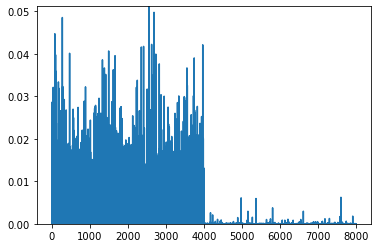

1.0441636884081859e-08
4000
1805
2195
2.01422952426081e-08
3999
1633
2368
2.427498580000486e-08
3998
1585
2417
2.6776290332695835e-08
3997
1556
2447
3.647808025899524e-08
3996
1486
2518
8.953115658335182e-08
3995
1267
2738
1.1165938241334504e-07
3994
1217
2789
2.152782668391812e-07
3993
1050
2957
2.6666514411002657e-07
3992
992
3016
3.267015633915957e-07
3991
940
3069
4.482996961691511e-07
3990
876
3134
4.798291446086077e-07
3989
860
3151
4.973497245639476e-07
3988
854
3158
5.396969024180663e-07
3987
836
3177
5.44401226421059e-07
3986
835
3179
6.096666284349167e-07
3985
801
3214
6.232879956453693e-07
3984
797
3219
6.334021799027425e-07
3983
794
3223
6.338890899731393e-07
3982
794
3224
6.794235542271508e-07
3981
777
3242
8.952842118241107e-07
3980
720
3300
1.0738402491510298e-06
3979
687
3334
1.1184473253864878e-06
3978
681
3341
1.132939605245331e-06
3977
679
3344
1.1537866179309046e-06
3976
675
3349
1.3136083963426104e-06
3975
651
3374
1.5052344266523534e-06
3974
622
3404
1.71017656406

KeyboardInterrupt: 

In [40]:



for pa in np.arange(0.03,0.04,0.01):
# for pa in [2.6000000000000014]:
    print(pa)
#     dens = make_pdf_eval(split_sc, pa)
    dens = make_pdf_eval(train_sc, pa)
    
    all_time = time.time()
    pdf_t = dens.pdf(test_sc)
    pdf_u = dens.pdf(unseen_sc)
#     pdf_tr = dens.pdf(split_sc)
    pdf_tr = dens.pdf(train_sc)
    

    pdf_all =  np.concatenate((pdf_t,pdf_u),axis = 0)
    print('all time : ', time.time() -all_time)
    
    print(max(pdf_tr))
    print(max(pdf_t))
    pdf_all = pdf_all/max(pdf_tr)
    pdf_at = pdf_all[:pdf_t.size]
    pdf_au = pdf_all[pdf_t.size:]
#     print(len(pdf_at[pdf_at == min(pdf_all)]))
    
    plt.plot(pdf_all)
    plt.ylim([np.min(pdf_all),np.sort(pdf_at)[-1]])
#     plt.ylim([np.min(pdf_all),np.max(pdf_)[-8]])
    
    plt.show()
    for i in np.unique(pdf_at)[:100]:
        print(i)
        print(len(pdf_at[pdf_at >= i]))
        print(len(pdf_au[pdf_au >= i]))
        print(len(pdf_at[pdf_at < i])+len(pdf_au[pdf_au < i]))
        
    print('----------------------------------')


In [97]:
i = 0.001
no = np.where(pdf_at<i)
print(X_test_path[no])
no_un = np.where(pdf_au<i)
print(np.array(unknown_path)[no_un])


yes = np.where(pdf_at>0.5)
# print(yes)
print(X_tet_path[yes])

yes_un = np.where(pdf_au>0.05)
# print(yes_un)
print(np.array(unknown_path)[yes_un])

['./part2_full_train_4X5000/4_993_reverb.wav'
 './part2_full_train_4X5000/1_613.wav'
 './part2_full_train_4X5000/1_476_reverb.wav'
 './part2_full_train_4X5000/4_559.wav'
 './part2_full_train_4X5000/0_906.wav'
 './part2_full_train_4X5000/0_170_reverb.wav'
 './part2_full_train_4X5000/0_873.wav'
 './part2_full_train_4X5000/1_4_reverb.wav'
 './part2_full_train_4X5000/1_877.wav'
 './part2_full_train_4X5000/2_597_noise.wav'
 './part2_full_train_4X5000/0_766_reverb.wav'
 './part2_full_train_4X5000/2_814.wav'
 './part2_full_train_4X5000/2_810_reverb.wav'
 './part2_full_train_4X5000/4_763.wav'
 './part2_full_train_4X5000/4_615_compressed.wav'
 './part2_full_train_4X5000/1_711_compressed.wav'
 './part2_full_train_4X5000/0_993_noise.wav'
 './part2_full_train_4X5000/2_797_compressed.wav'
 './part2_full_train_4X5000/4_535_reverb.wav'
 './part2_full_train_4X5000/3_13_reverb.wav'
 './part2_full_train_4X5000/1_202_reverb.wav'
 './part2_full_train_4X5000/2_18.wav'
 './part2_full_train_4X5000/1_877_reve

NameError: name 'X_tet_path' is not defined

<ipython-input-61-a49c7c9602cc>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


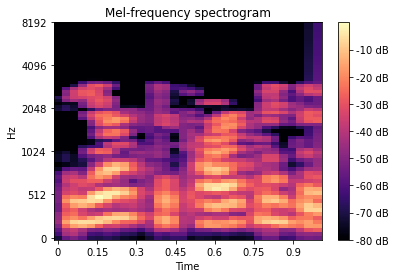

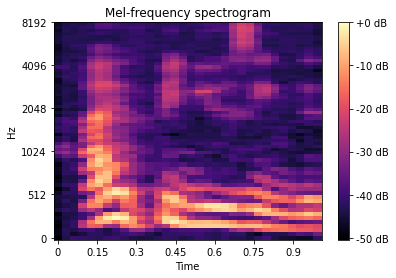

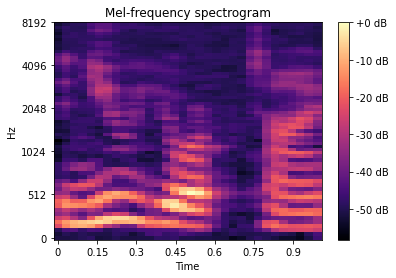

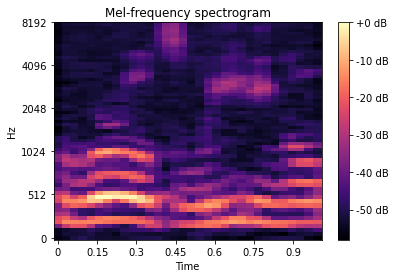

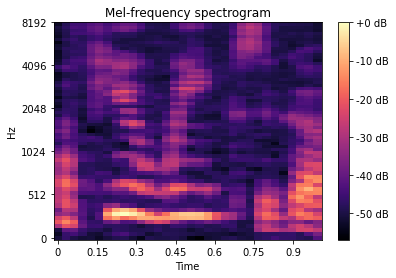

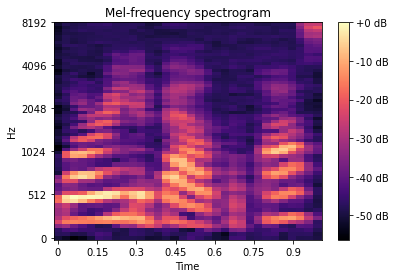

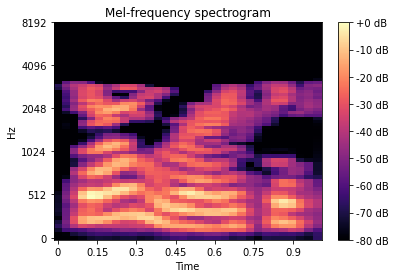

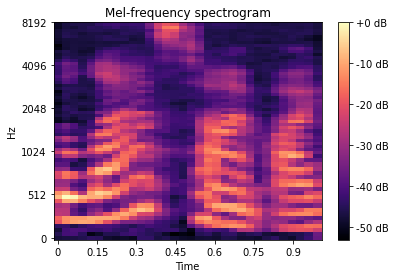

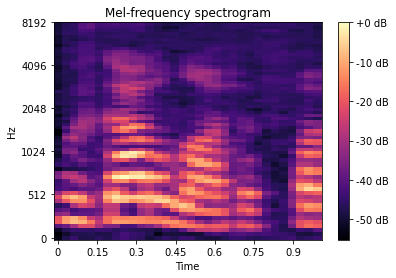

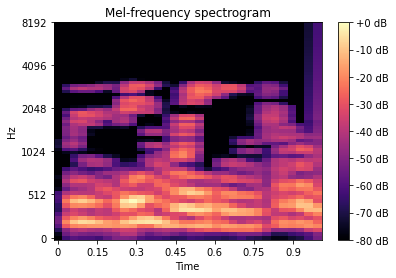

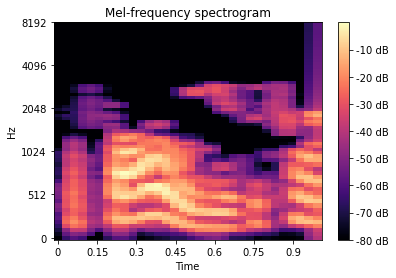

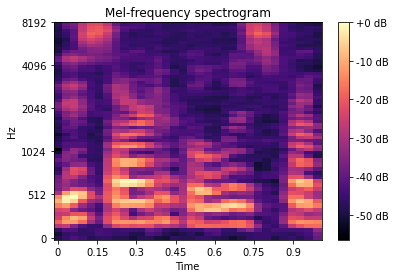

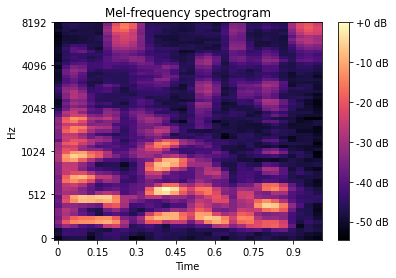

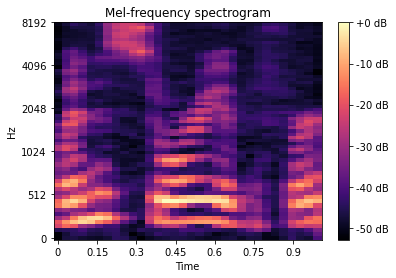

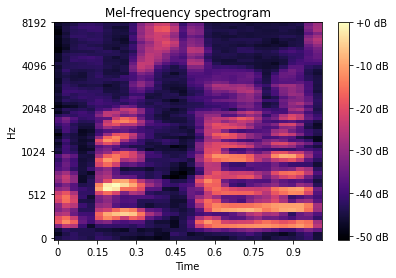

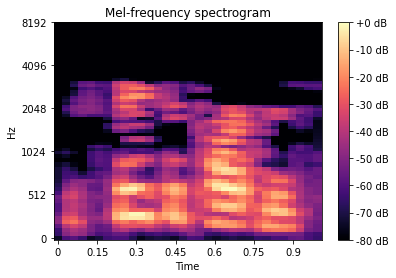

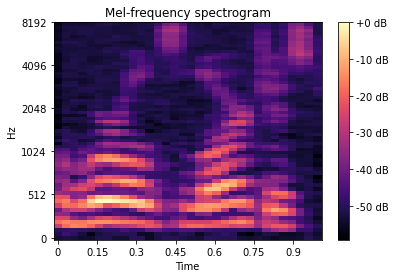

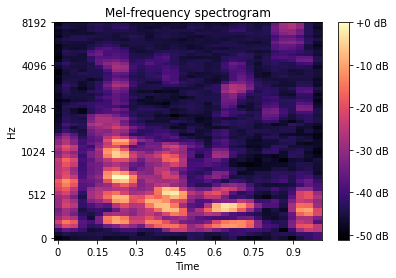

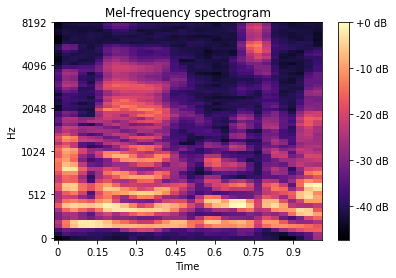

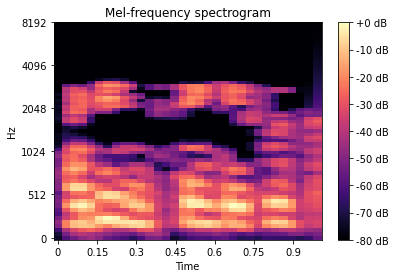

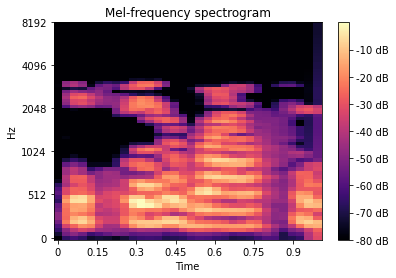

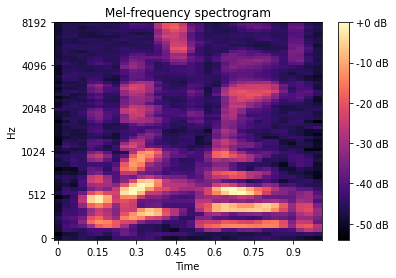

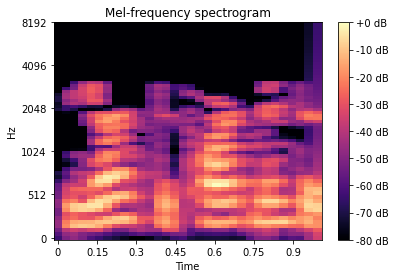

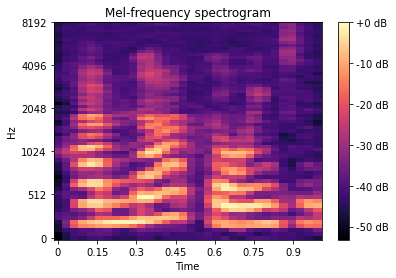

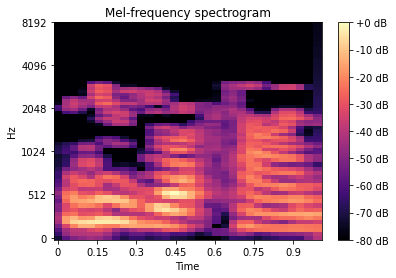

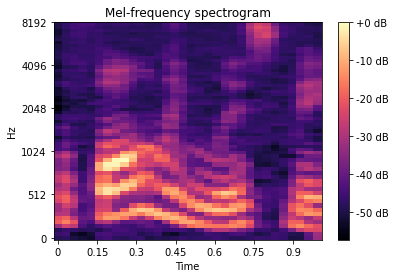

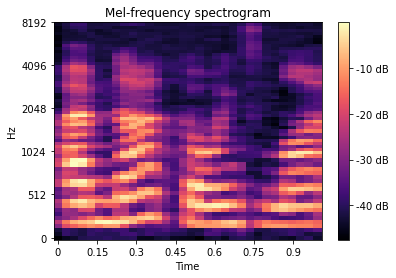

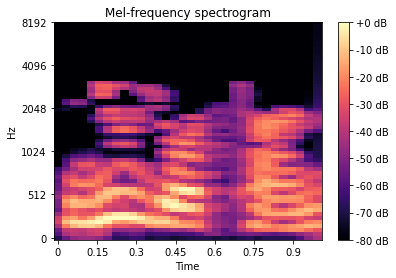

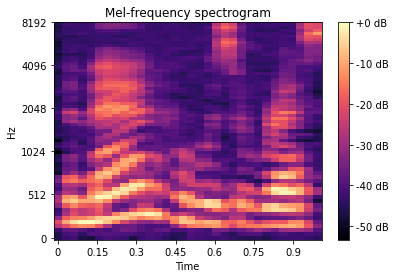

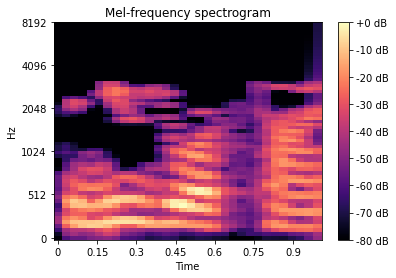

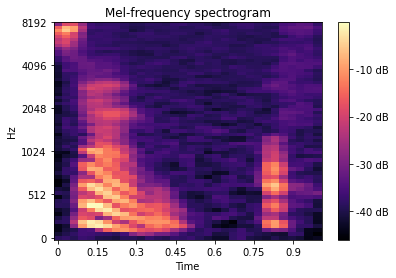

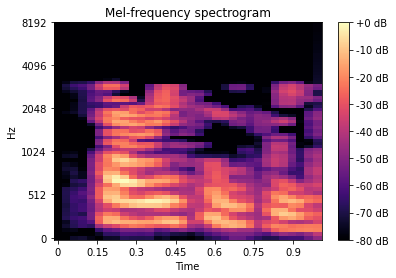

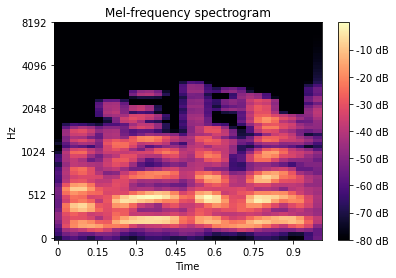

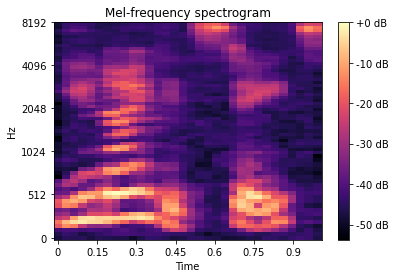

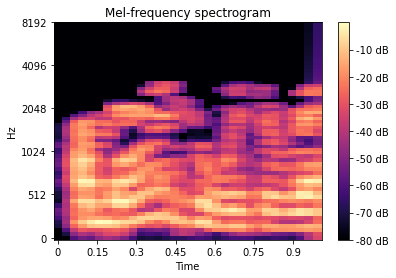

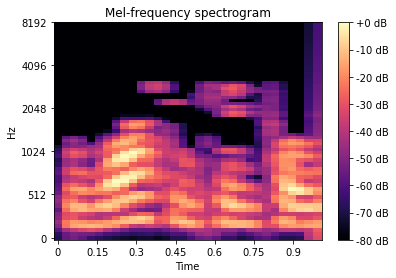

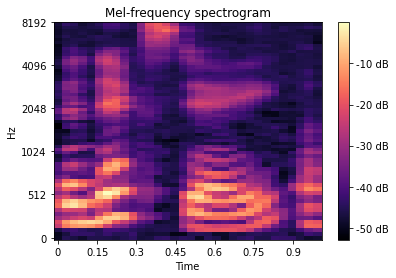

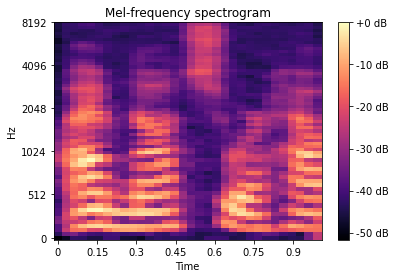

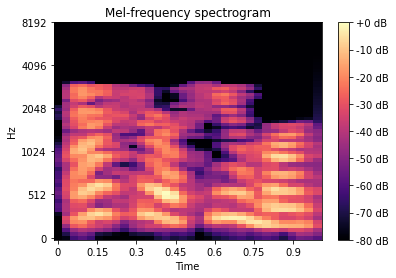

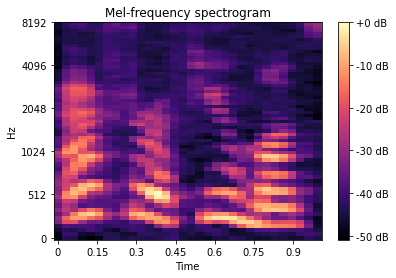

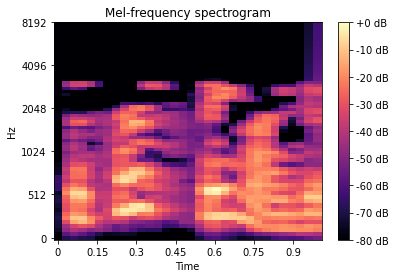

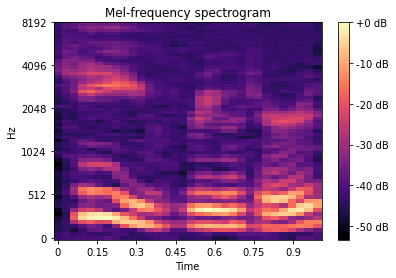

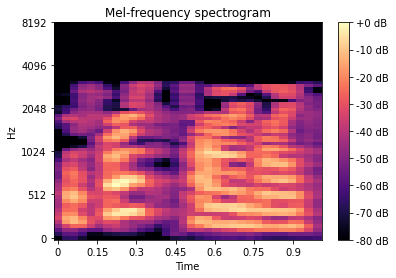

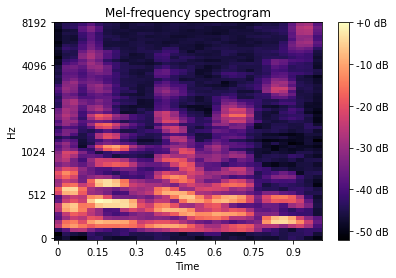

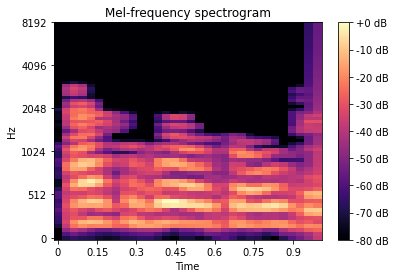

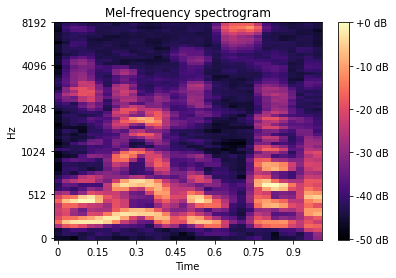

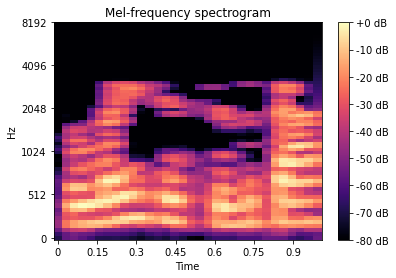

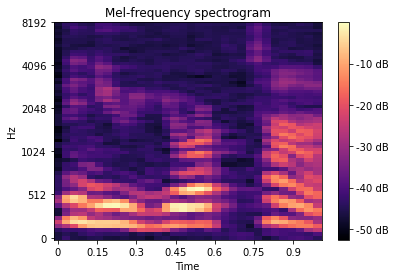

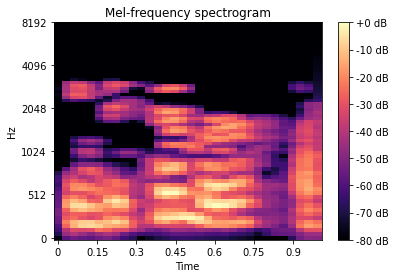

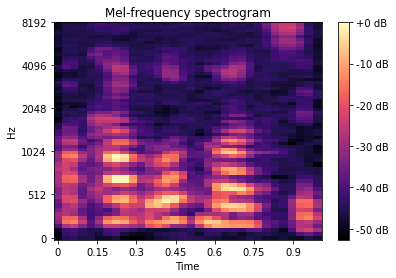

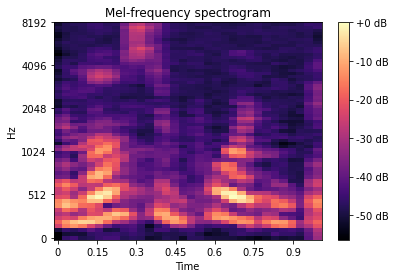

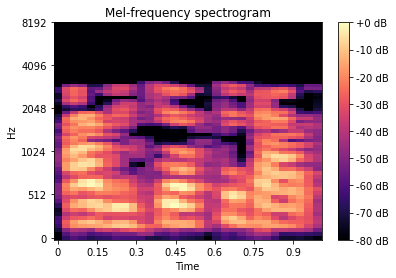

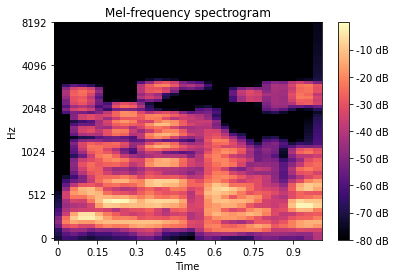

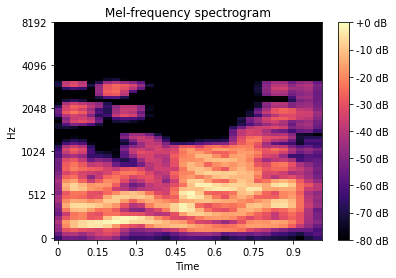

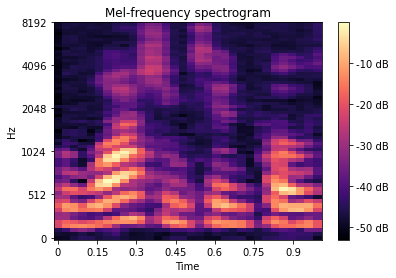

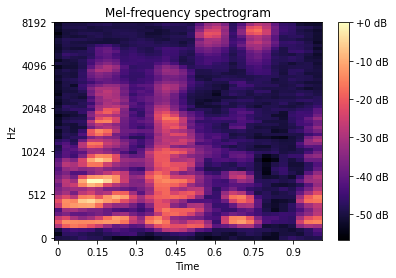

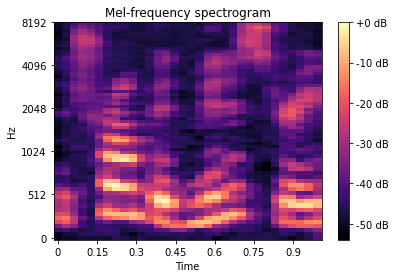

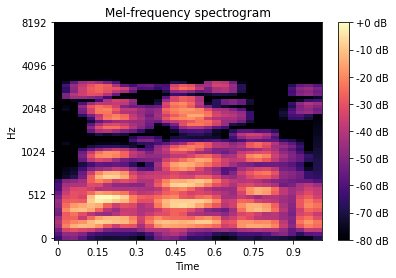

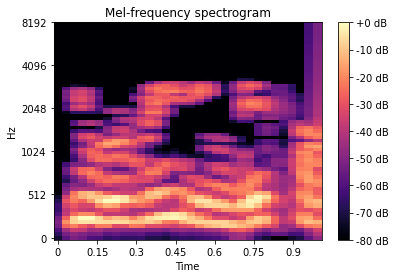

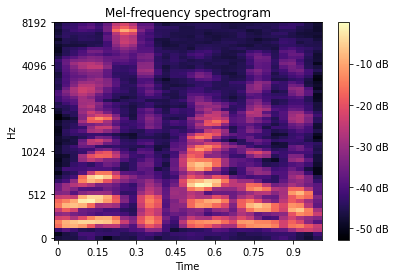

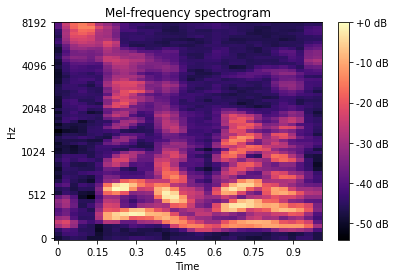

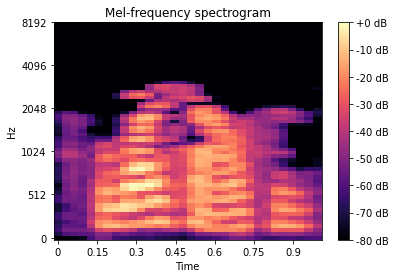

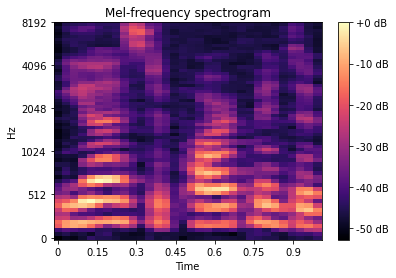

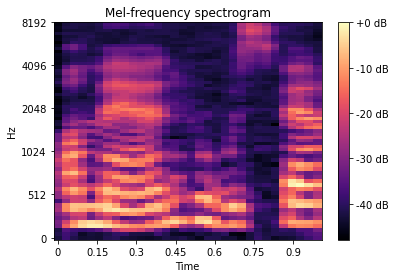

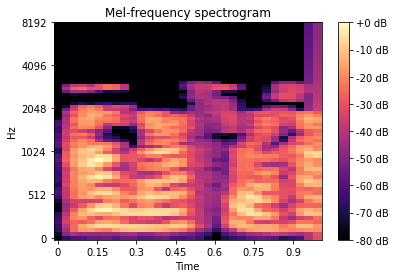

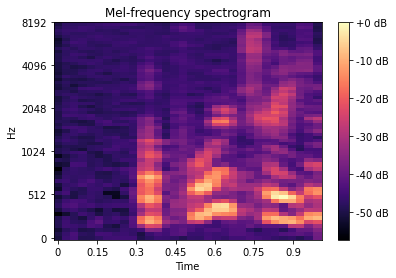

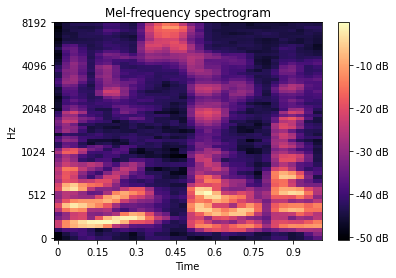

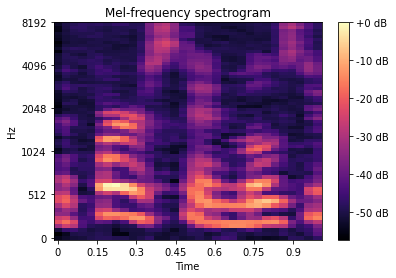

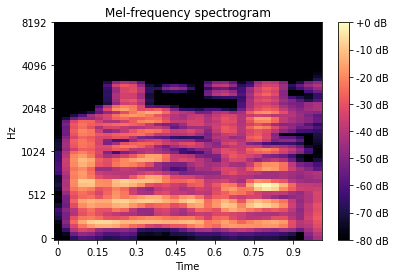

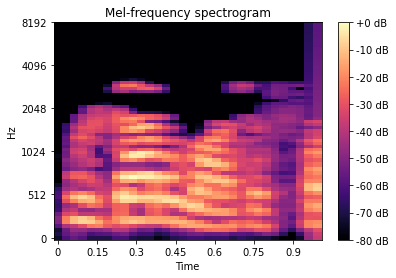

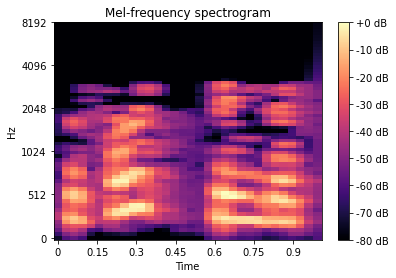

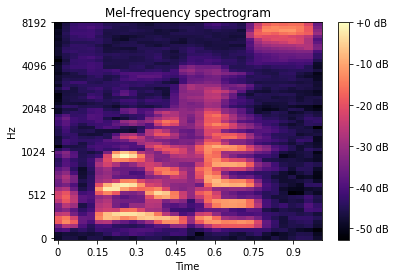

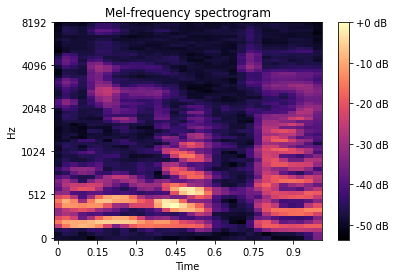

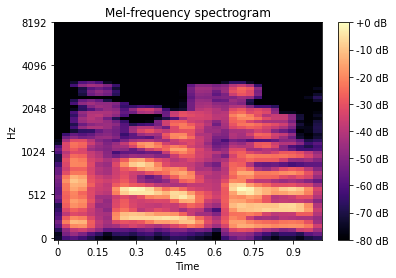

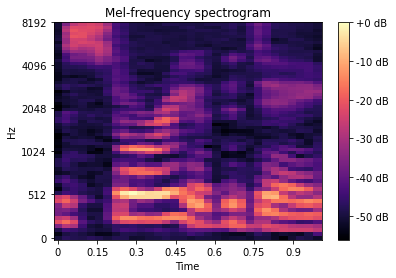

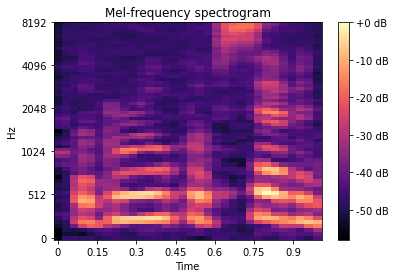

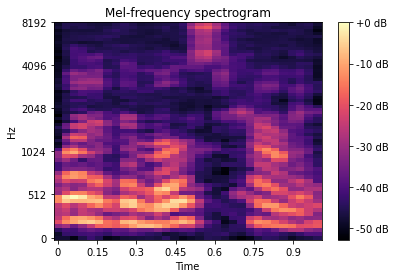

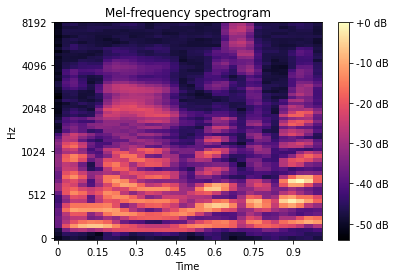

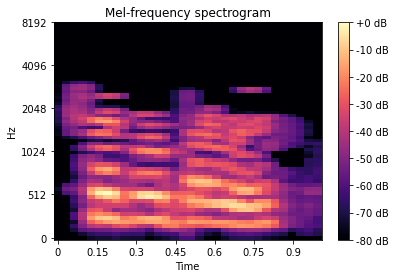

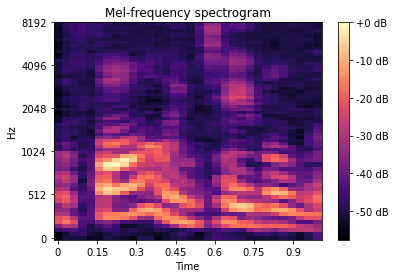

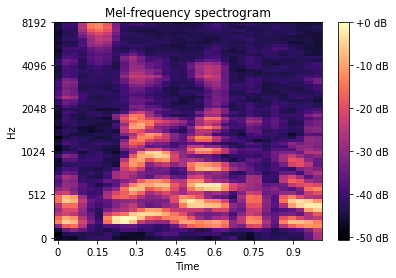

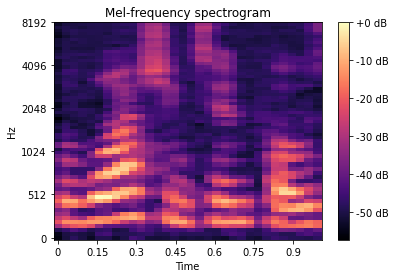

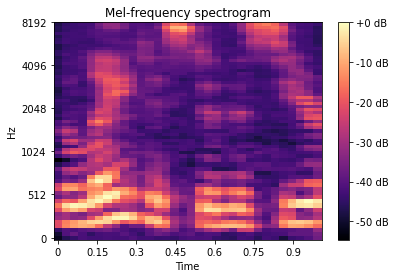

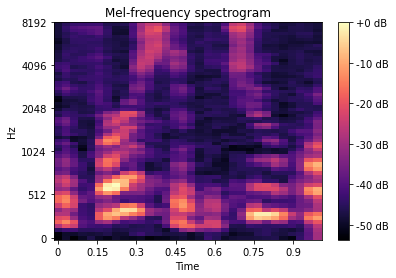

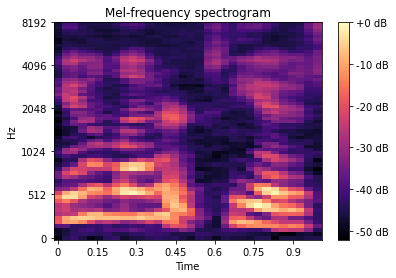

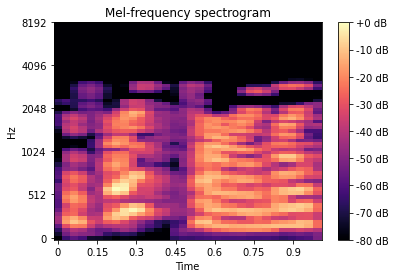

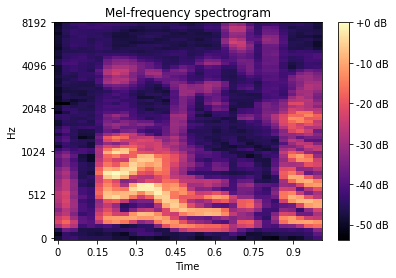

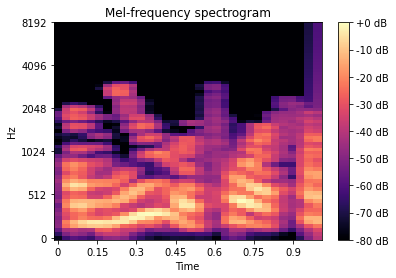

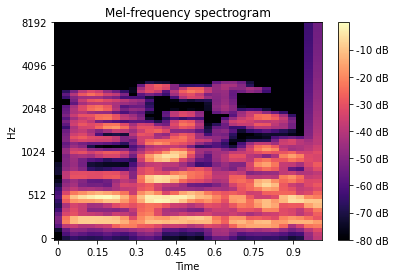

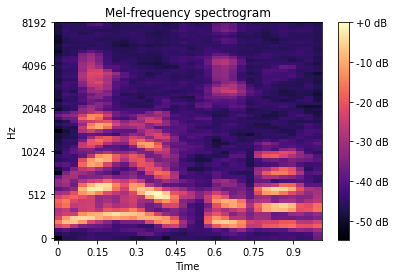

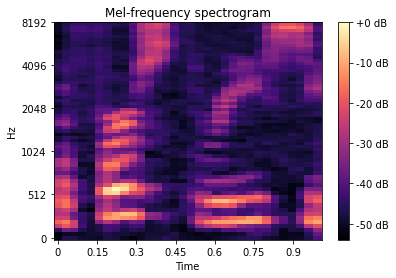

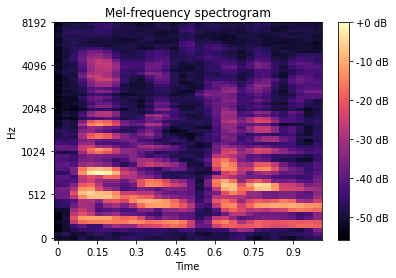

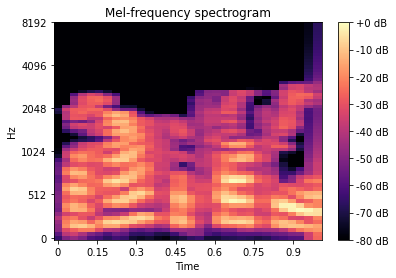

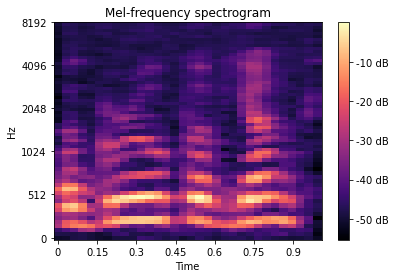

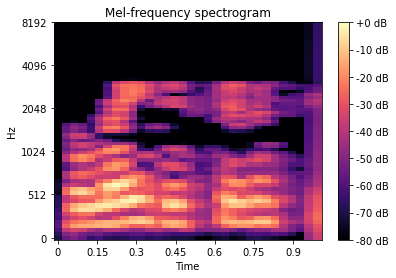

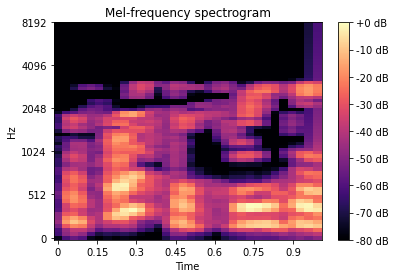

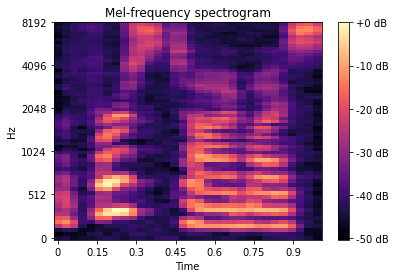

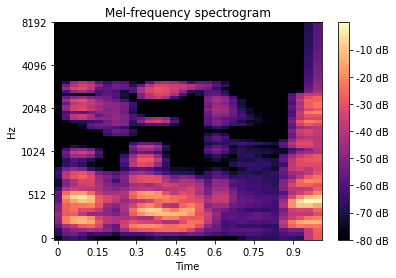

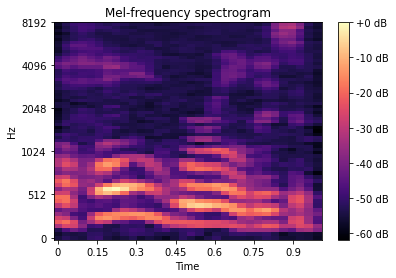

In [61]:
import librosa.display
sampling_rate = 16000
for i, filepath in enumerate(X_test_path[no]):
    
    # fig, ax = plt.subplots()
    y, sr = librosa.load(filepath, mono=True, sr=sampling_rate)
    index_f = 0
#     for j in range(y.size // sampling_rate):
    for j in range(1):
    
        X_aug_seg = y[index_f:index_f + sampling_rate]
        X_aug_seg = np.array(X_aug_seg)
        
#         freqs, bicoh = compute_bicoherence(X_aug_seg, X_aug_seg, 16000)
#         f = plt.figure(figsize = (9, 9))
#         plt.pcolormesh(freqs, freqs, bicoh, )
#         plt.colorbar()
#         plt.clim(0, 0.5)
#         plt.show()
        
               
        S = librosa.feature.melspectrogram(y=X_aug_seg, sr=sampling_rate, n_mels=64, fmax=8000)
        # S_dB = S
        S_dB = librosa.power_to_db(S, ref=np.max)
        
        fig, ax = plt.subplots()
#         S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, x_axis='time',
                                 y_axis='mel', sr=16000,
                                 fmax=8000, ax=ax)
        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        ax.set(title='Mel-frequency spectrogram')
#         X_mel_aug.append(S_dB)
    index_f += sampling_rate

<ipython-input-57-7627a40b2437>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


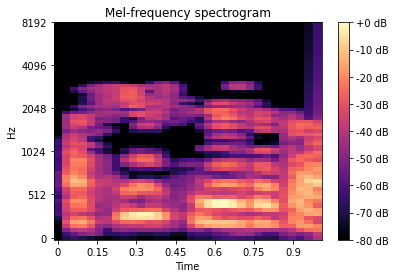

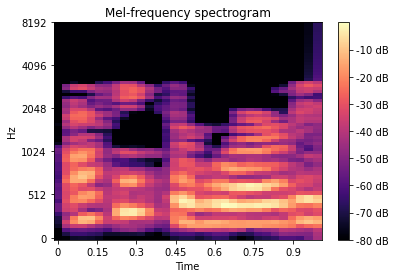

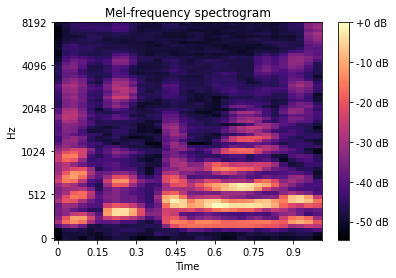

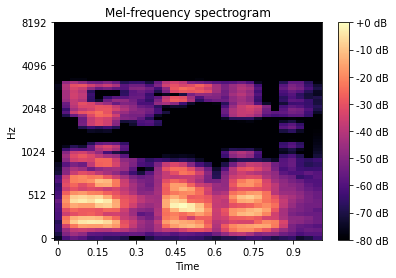

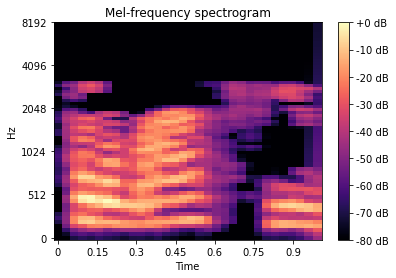

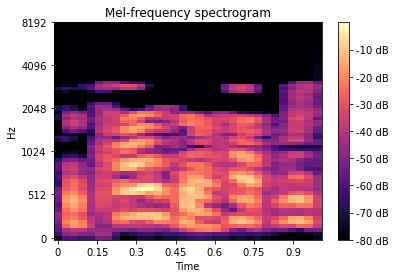

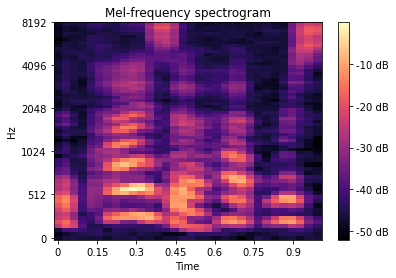

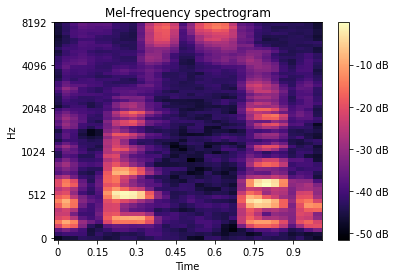

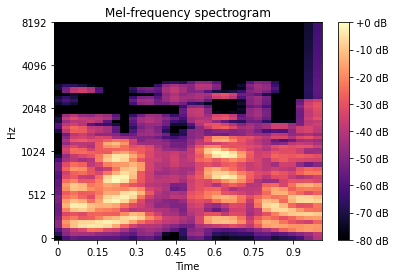

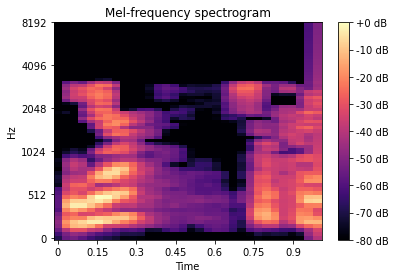

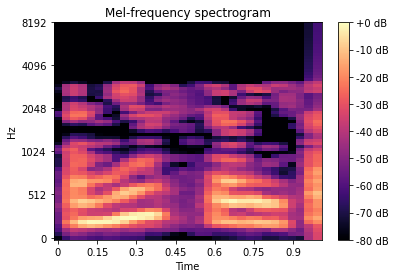

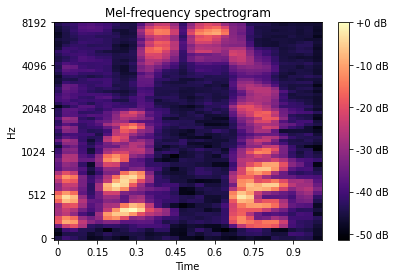

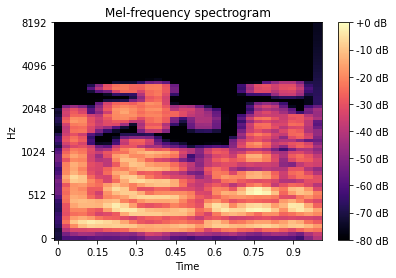

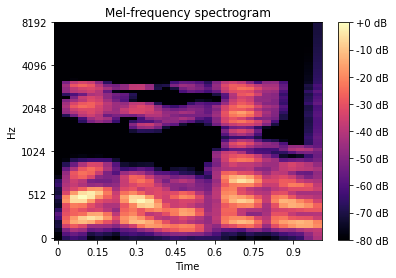

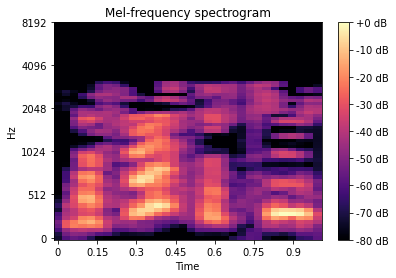

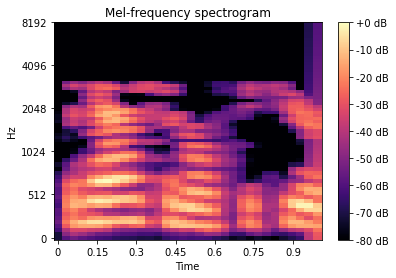

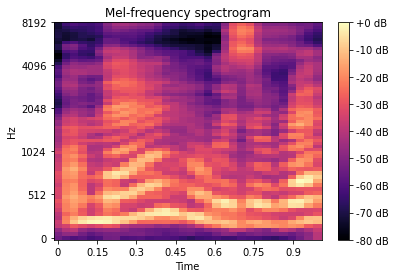

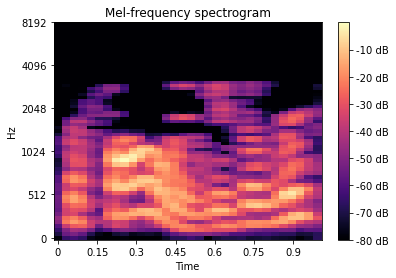

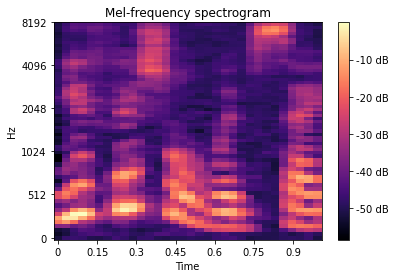

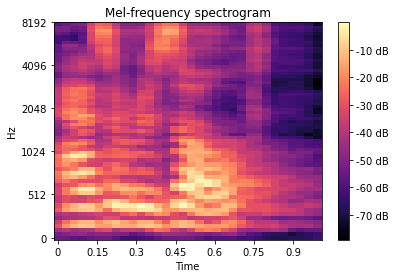

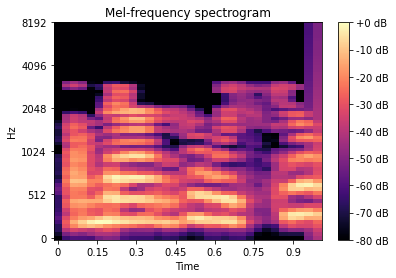

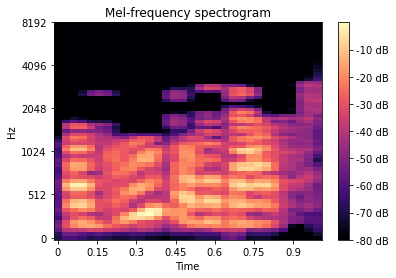

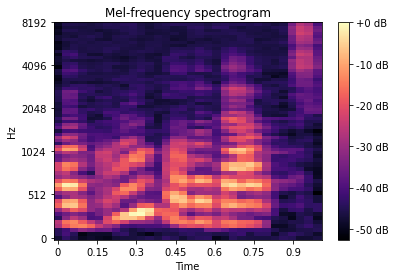

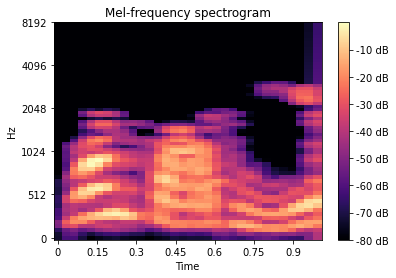

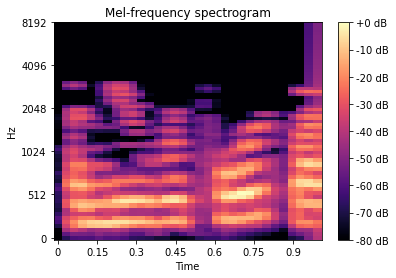

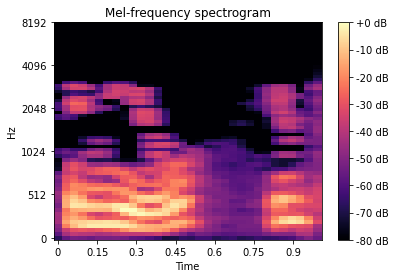

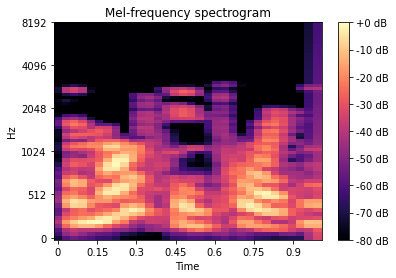

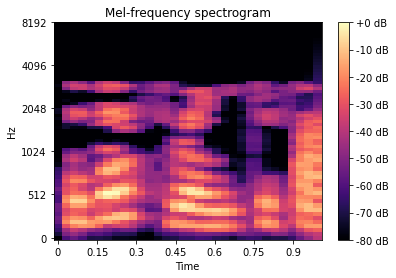

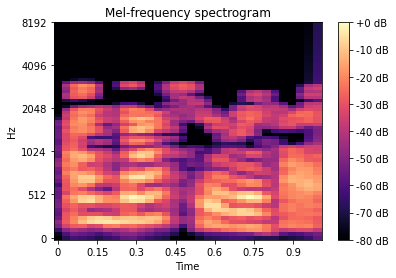

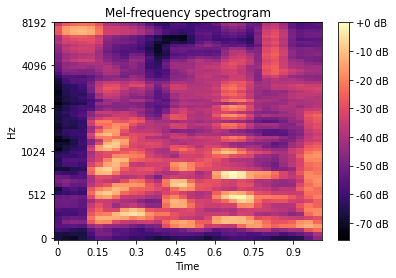

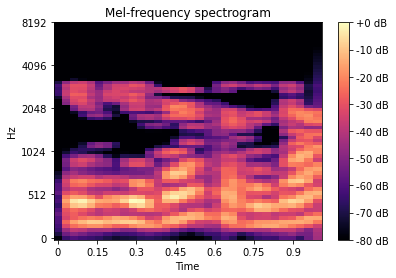

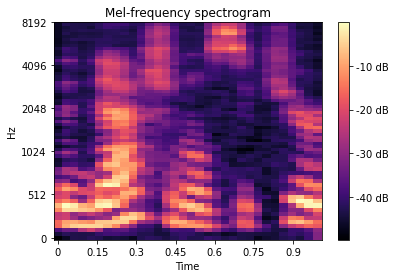

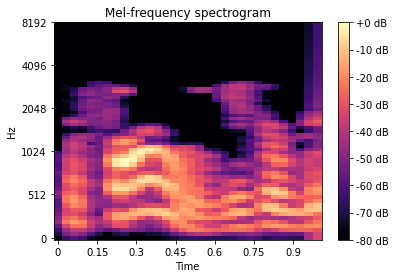

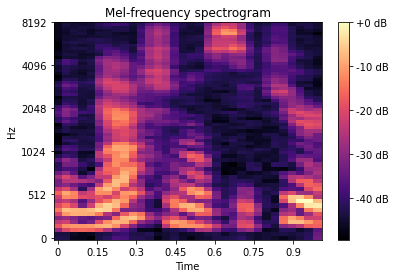

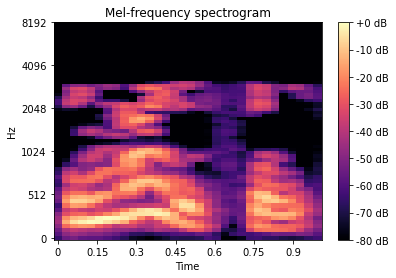

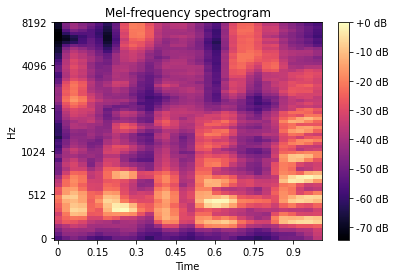

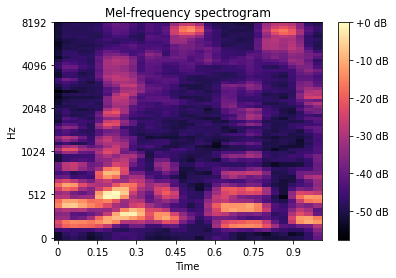

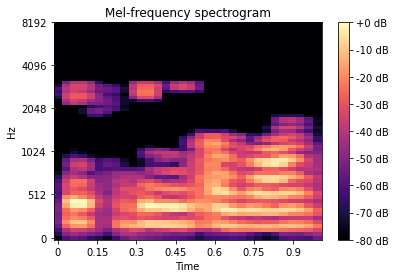

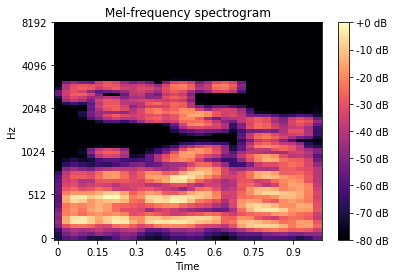

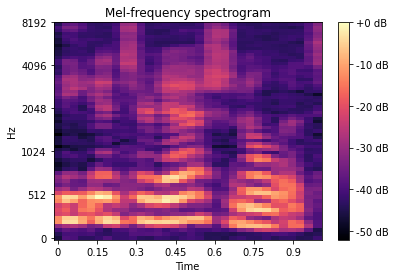

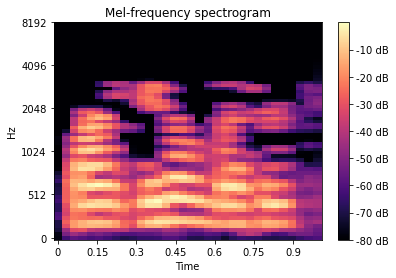

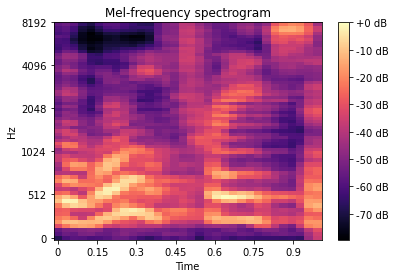

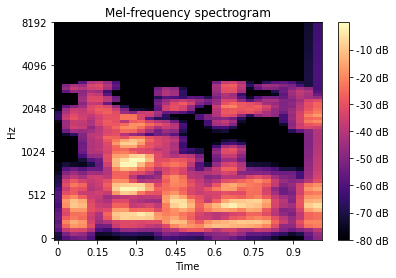

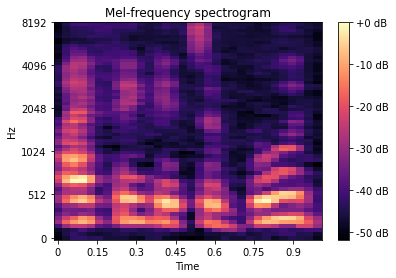

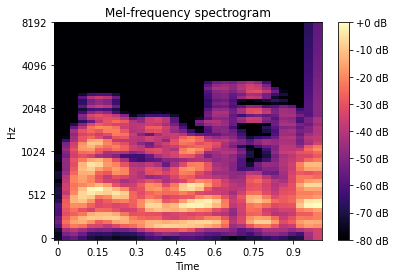

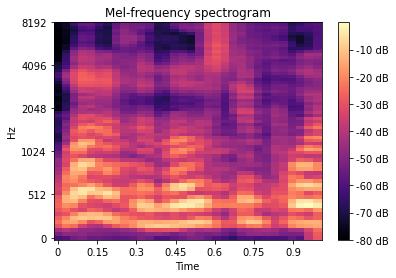

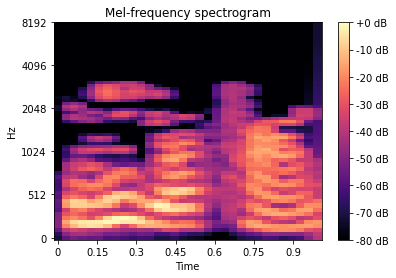

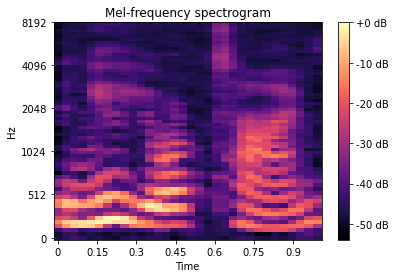

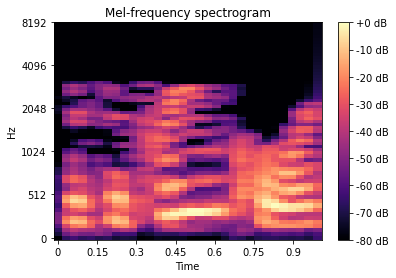

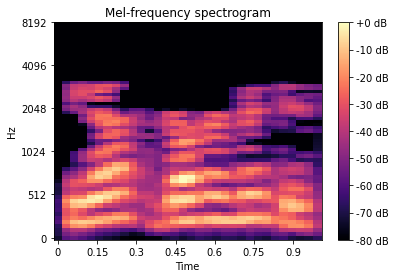

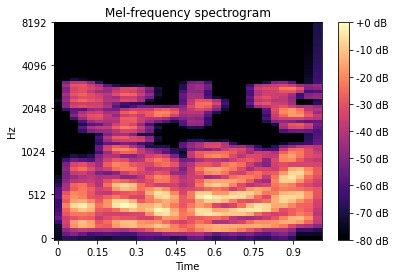

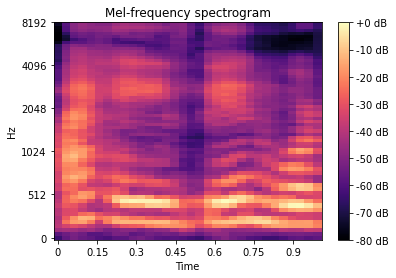

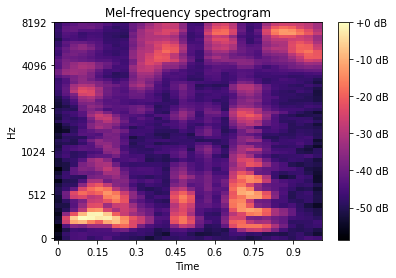

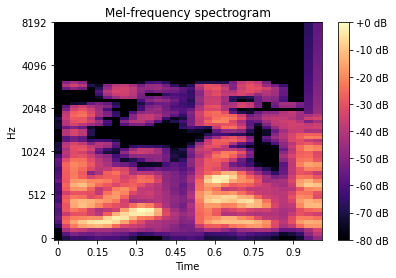

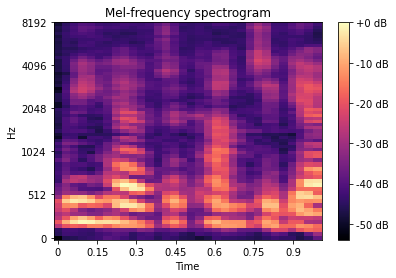

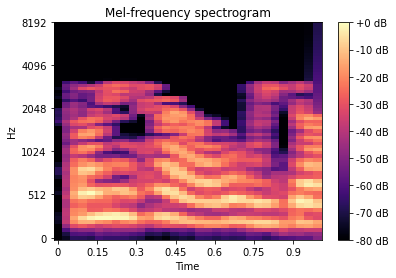

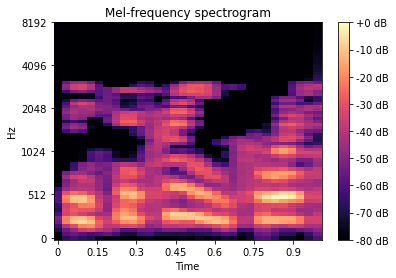

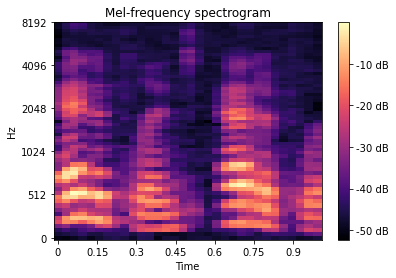

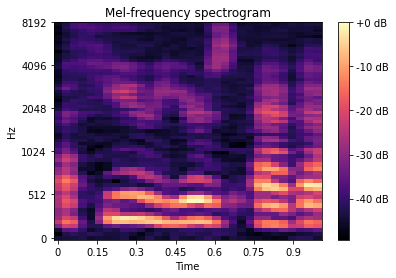

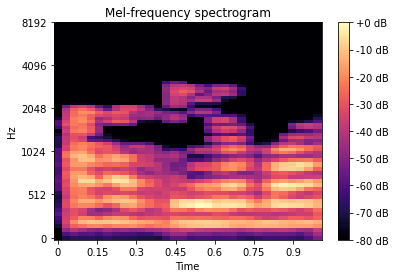

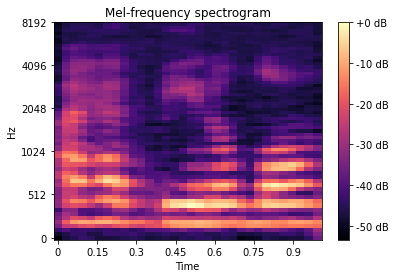

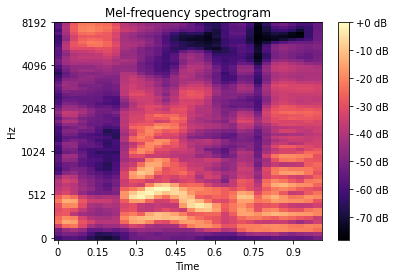

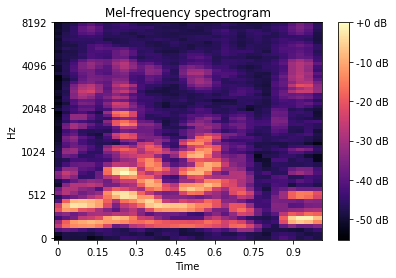

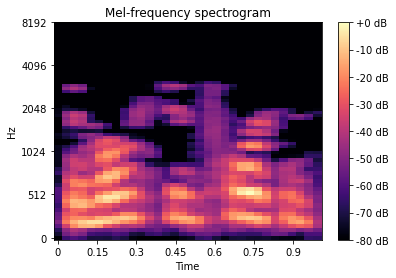

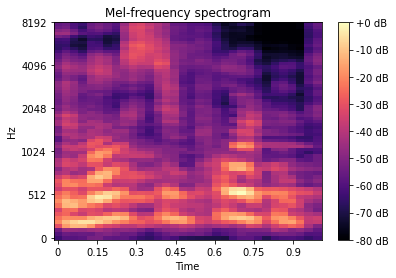

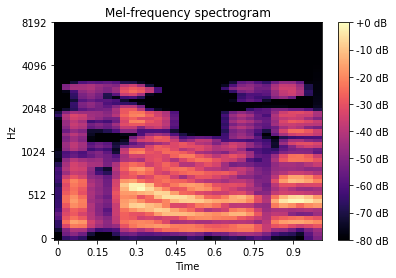

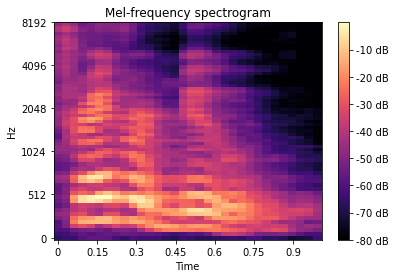

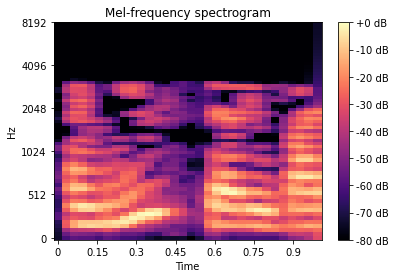

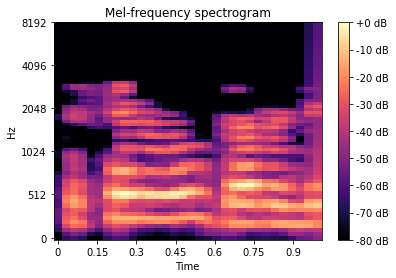

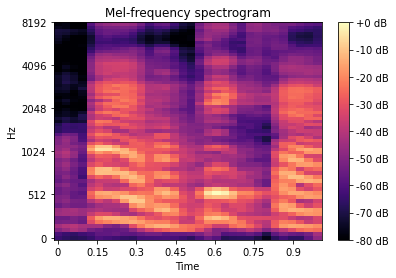

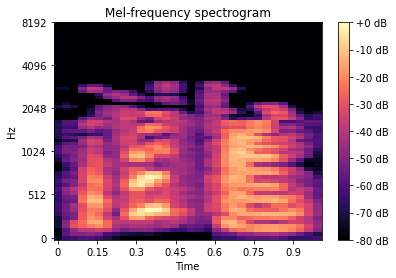

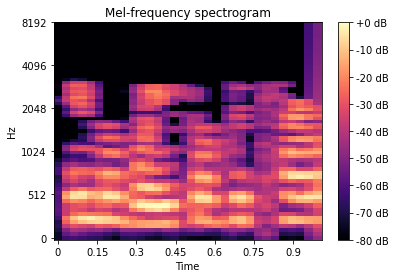

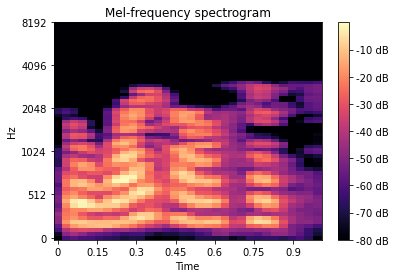

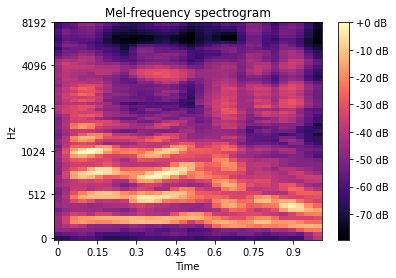

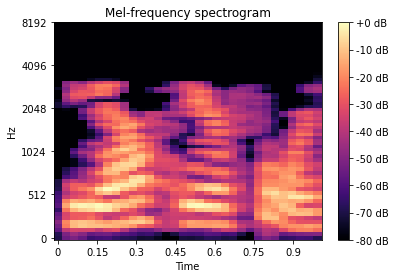

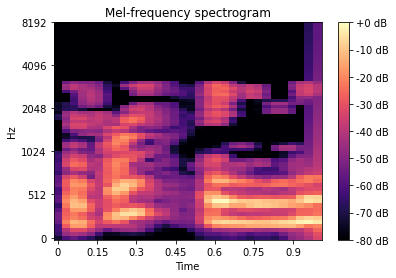

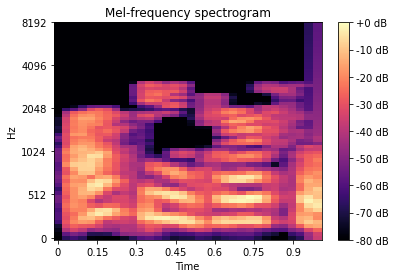

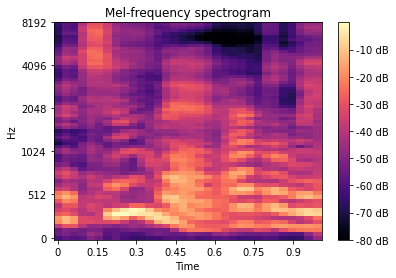

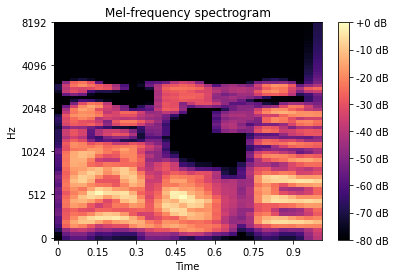

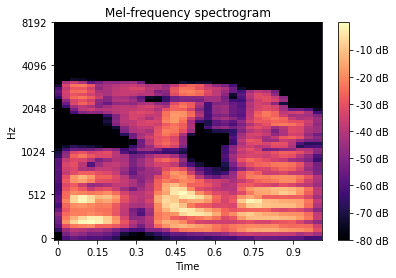

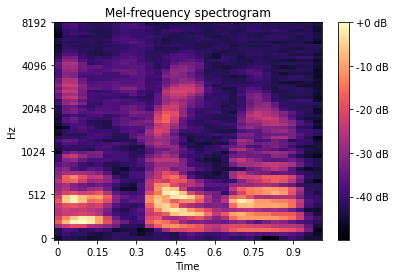

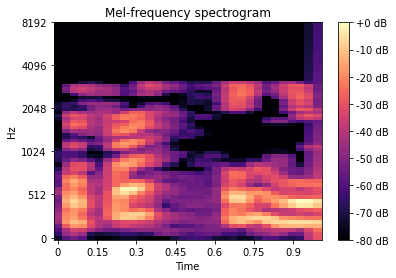

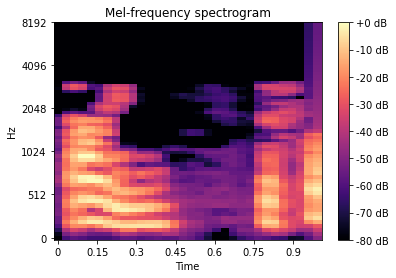

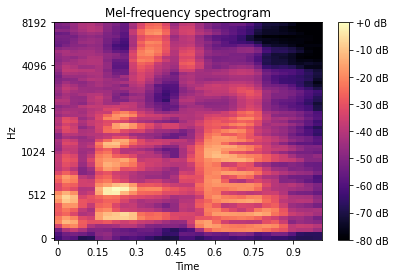

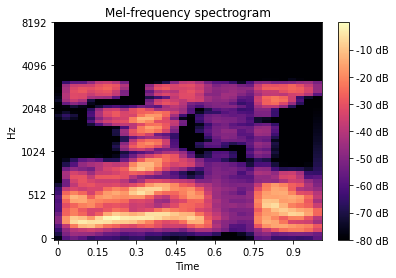

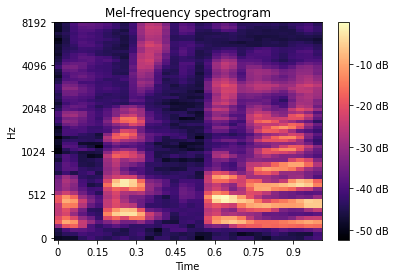

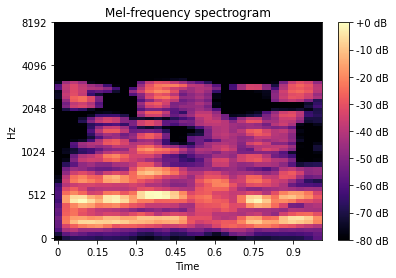

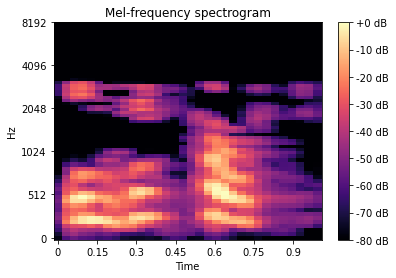

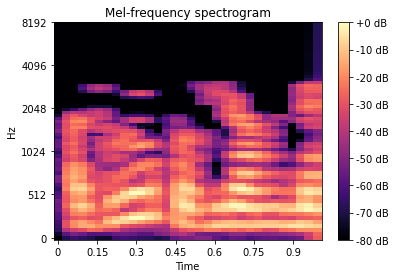

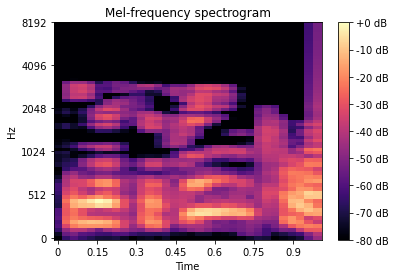

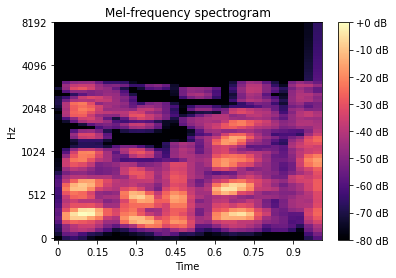

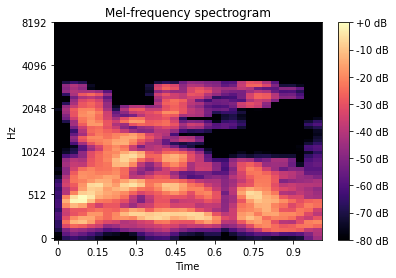

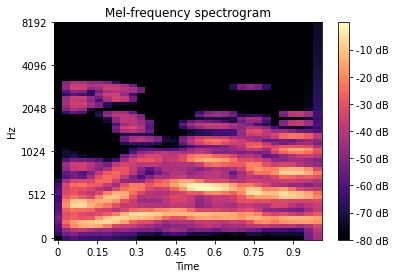

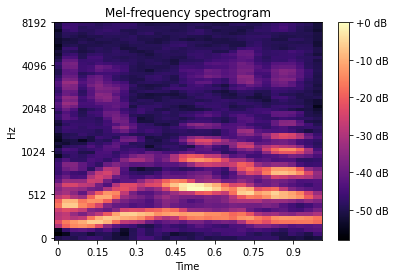

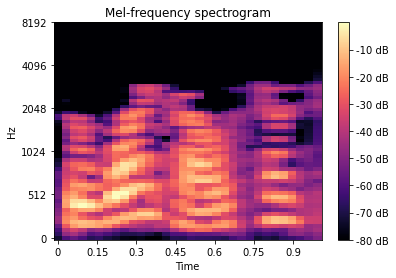

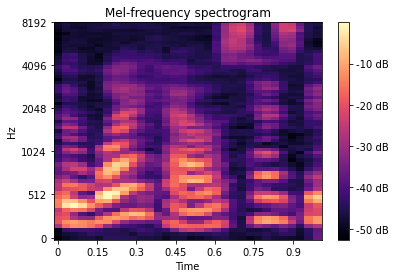

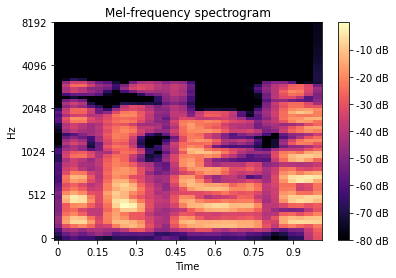

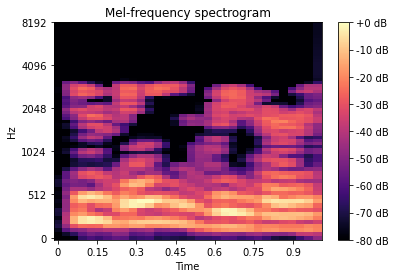

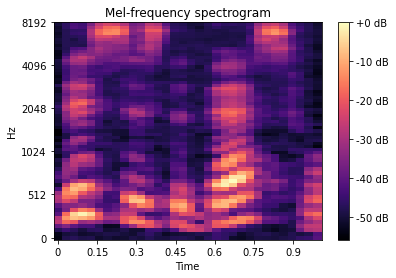

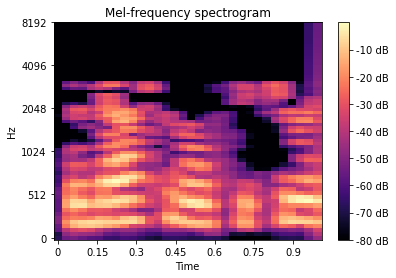

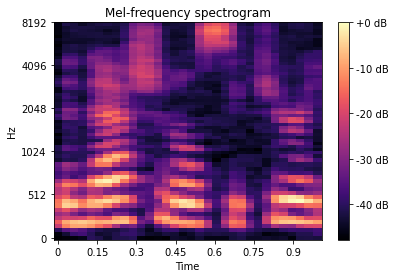

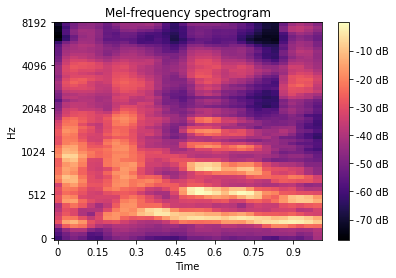

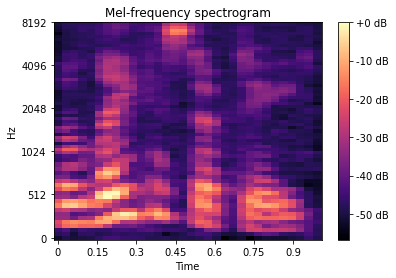

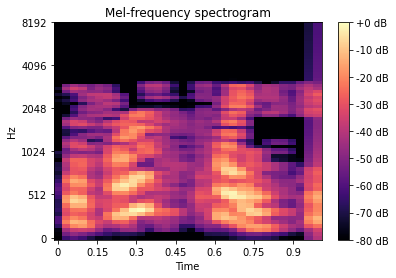

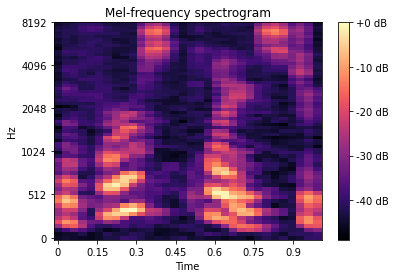

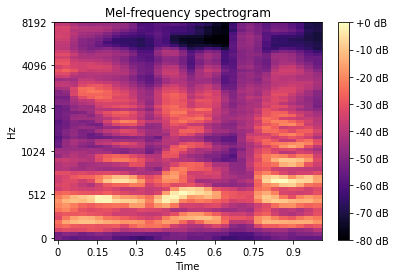

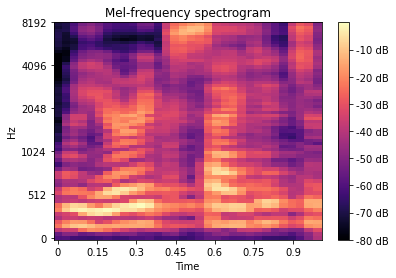

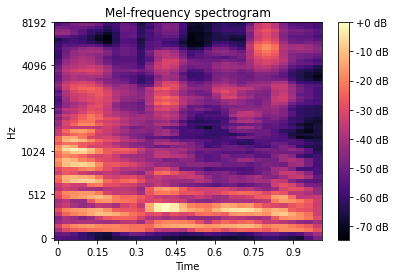

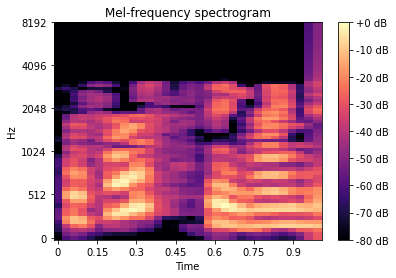

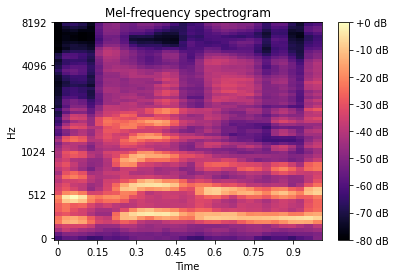

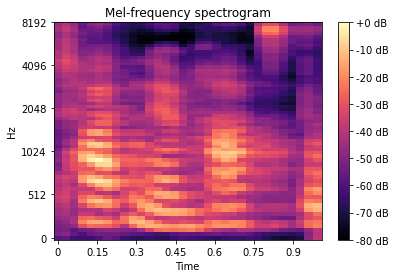

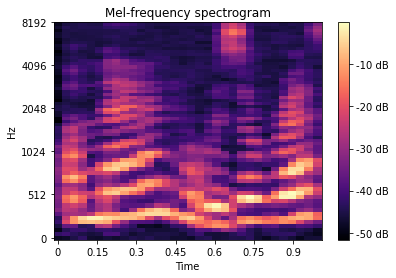

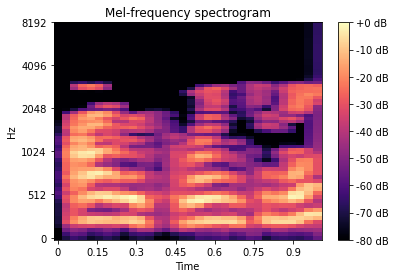

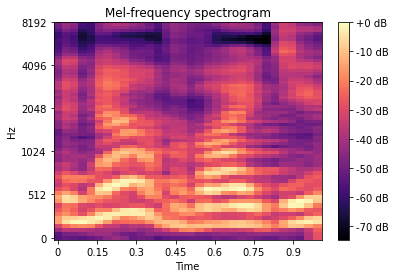

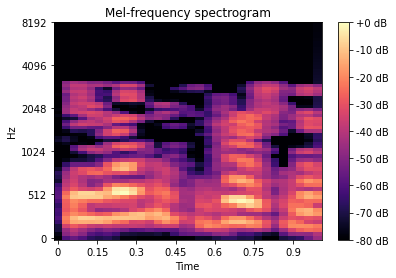

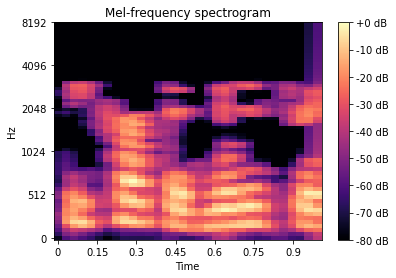

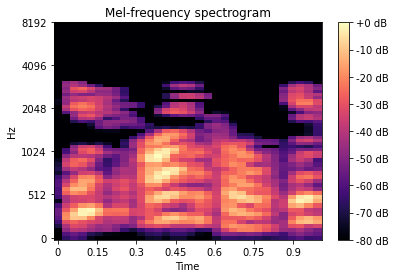

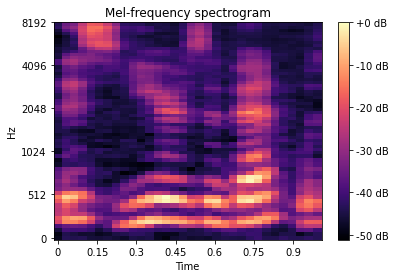

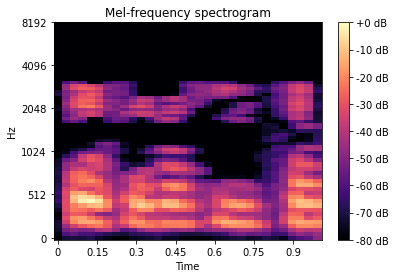

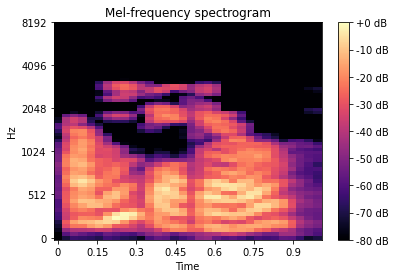

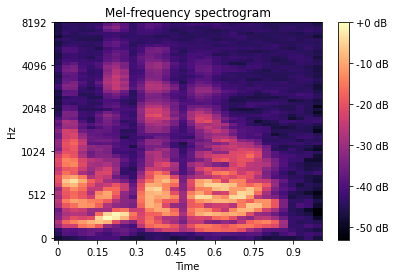

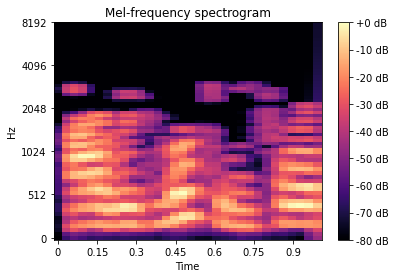

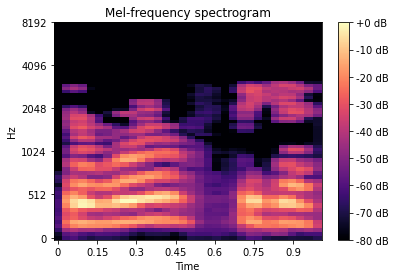

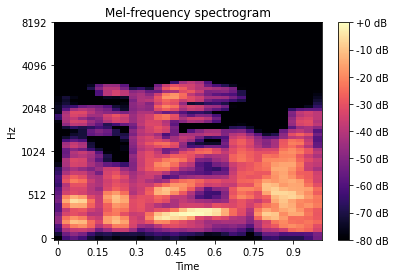

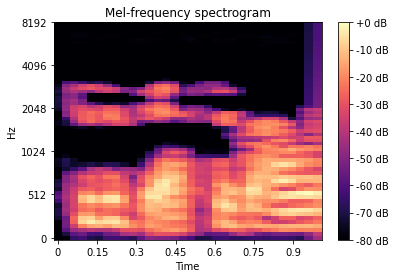

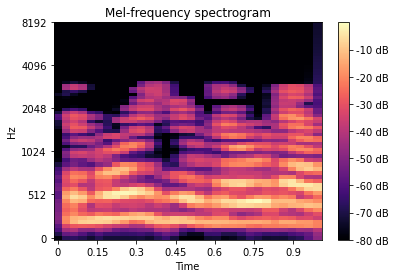

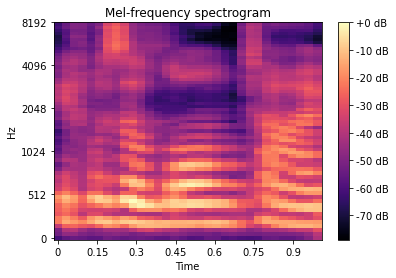

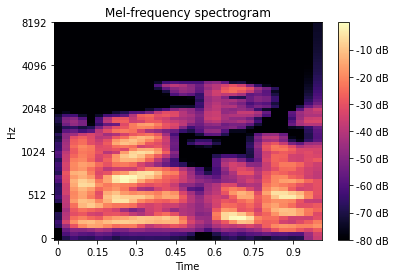

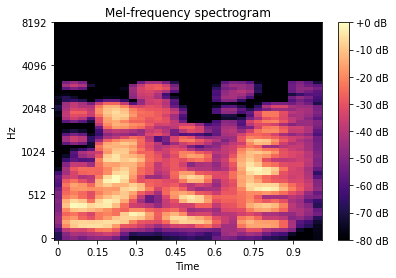

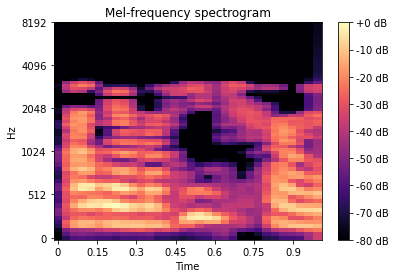

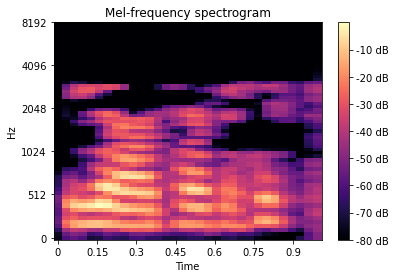

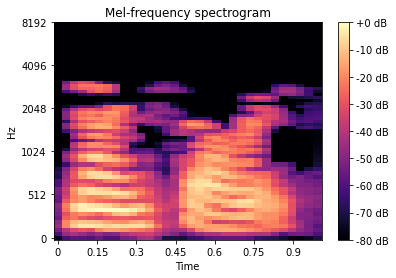

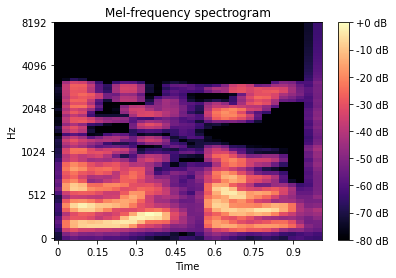

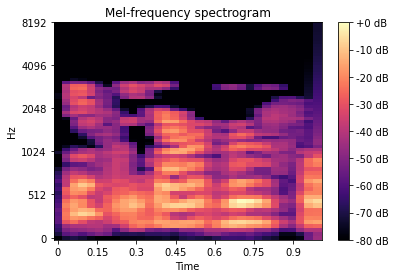

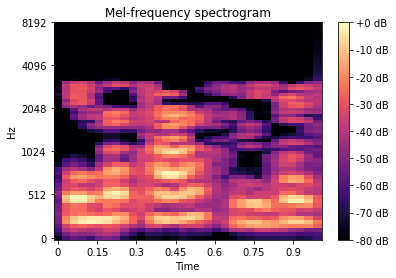

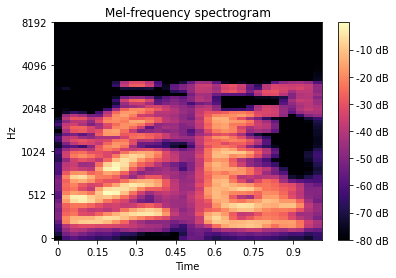

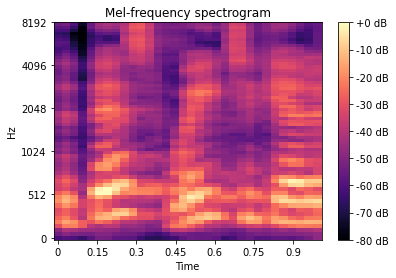

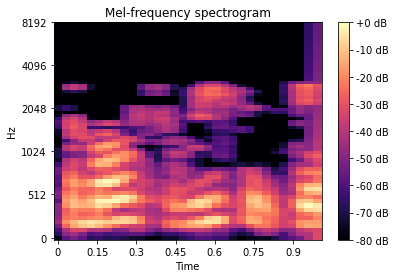

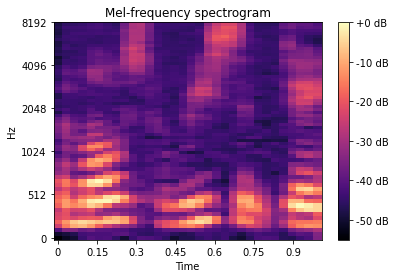

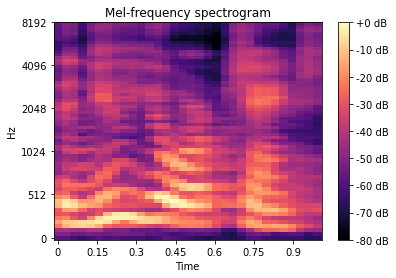

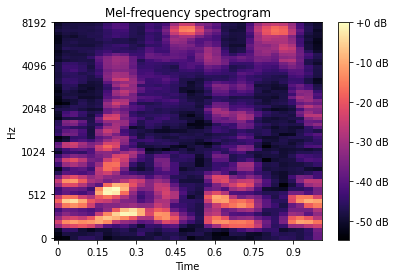

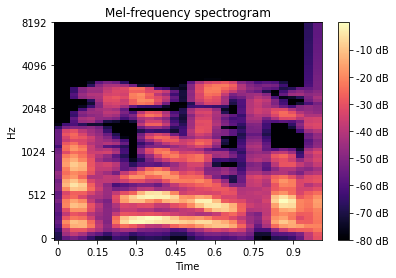

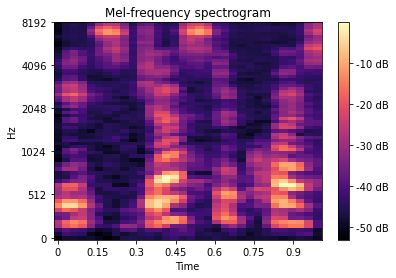

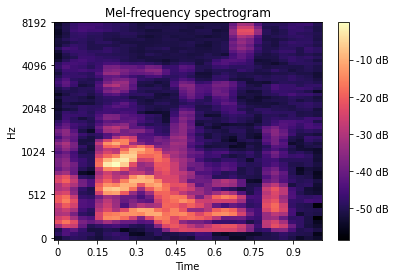

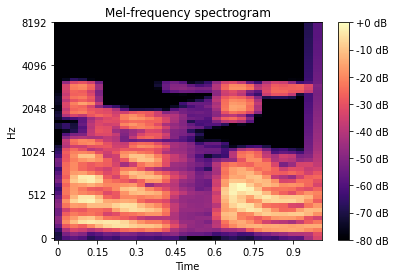

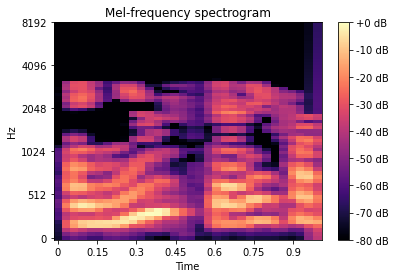

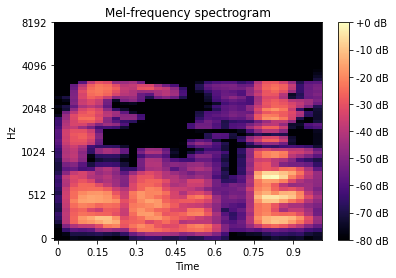

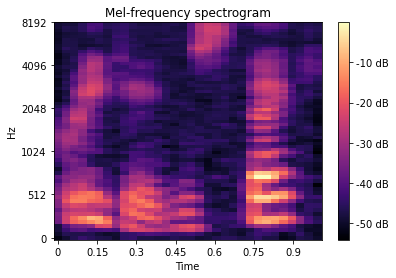

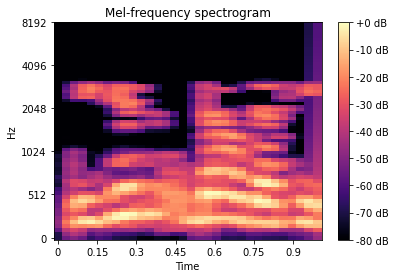

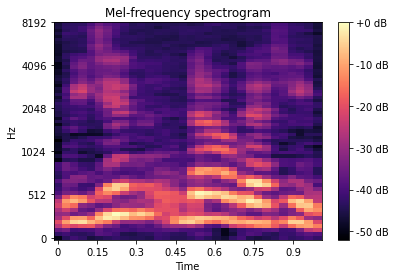

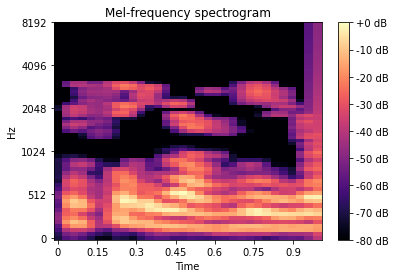

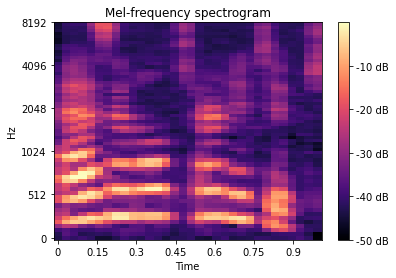

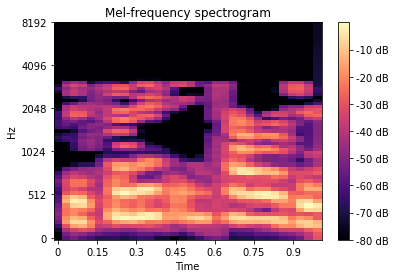

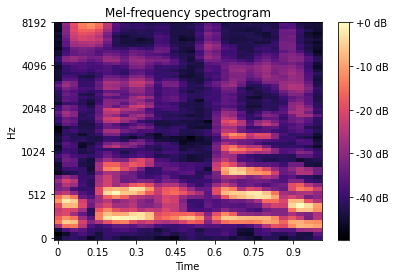

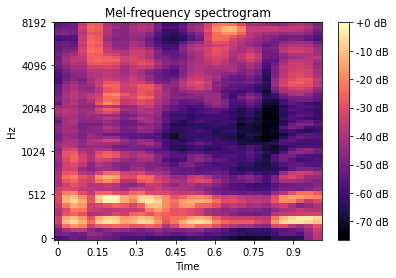

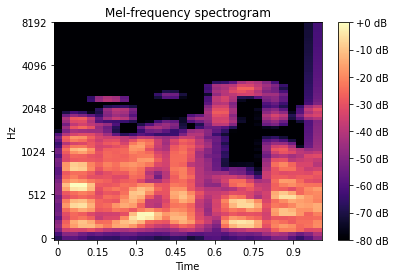

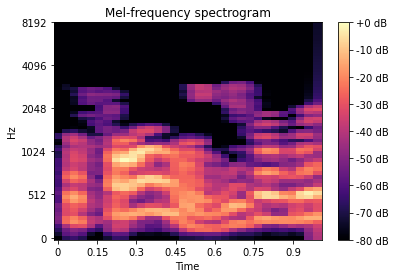

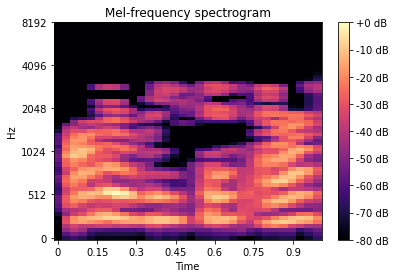

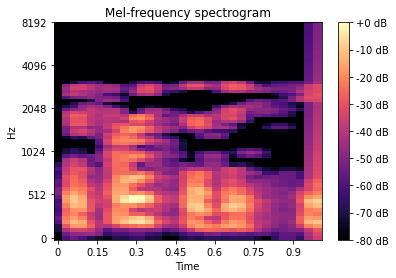

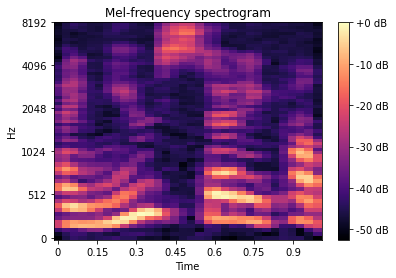

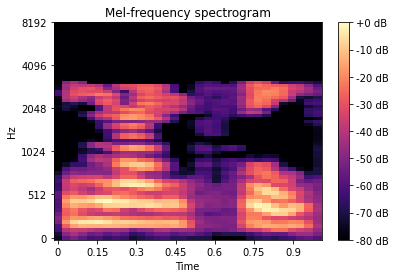

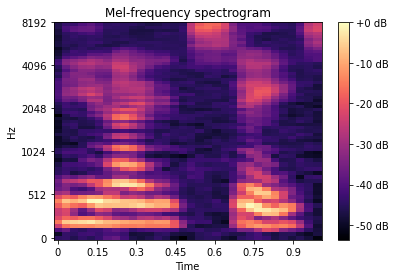

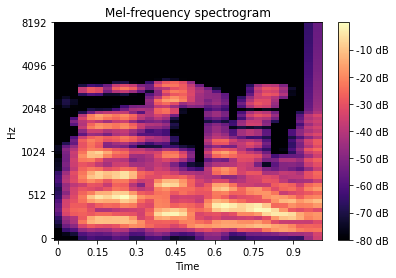

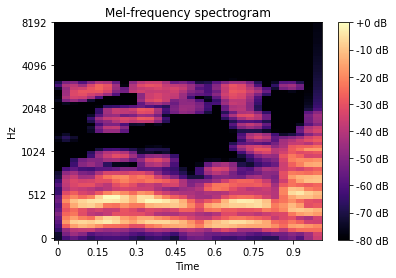

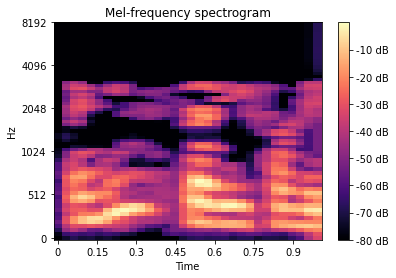

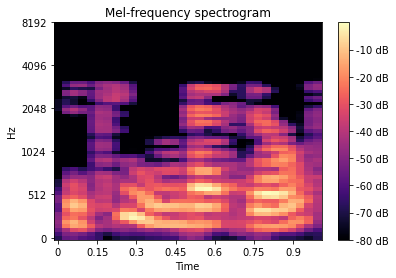

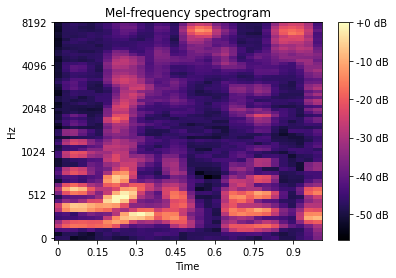

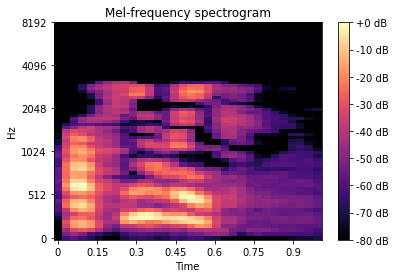

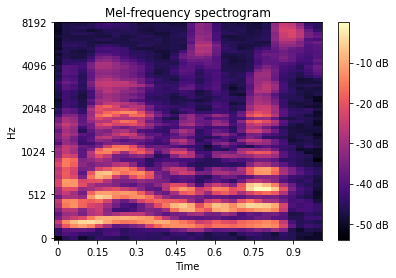

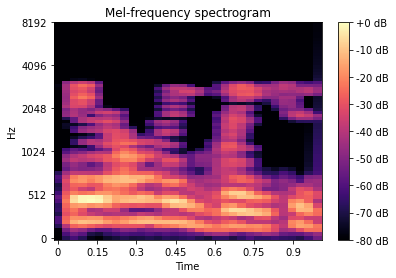

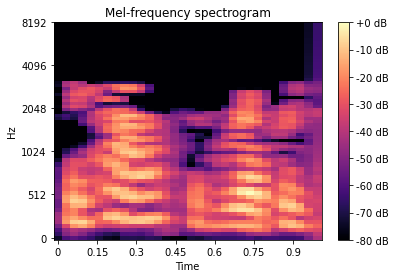

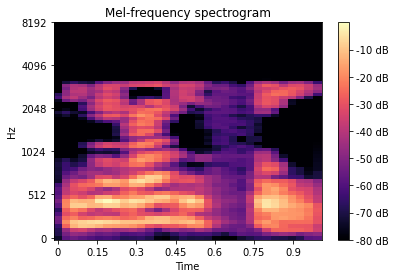

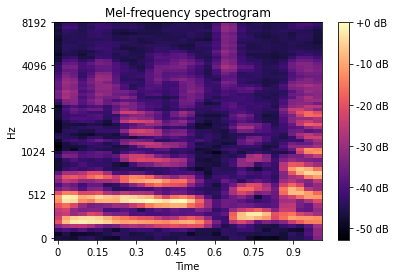

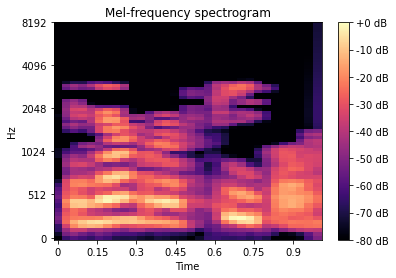

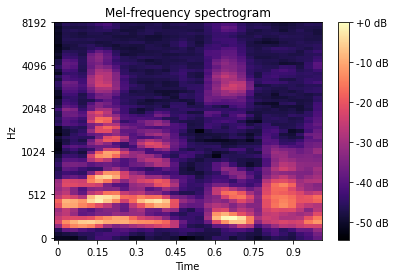

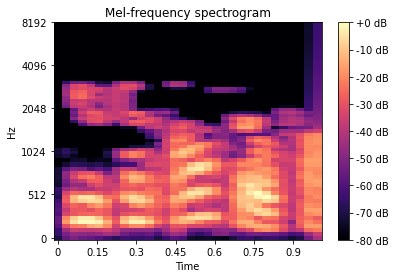

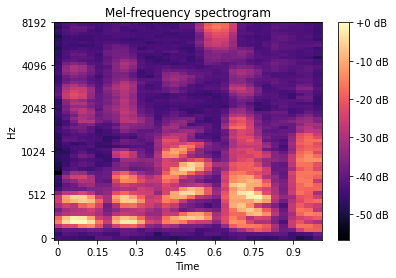

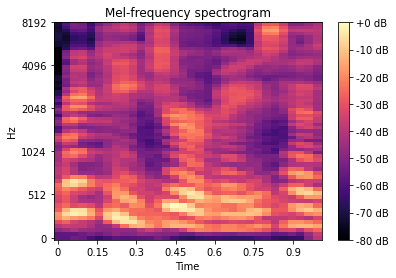

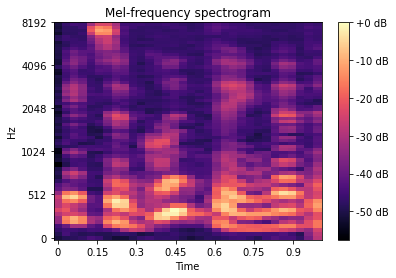

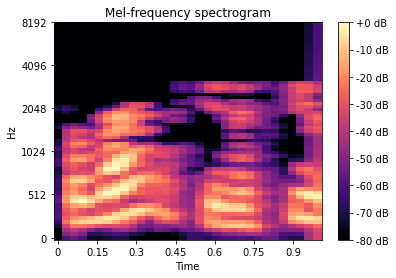

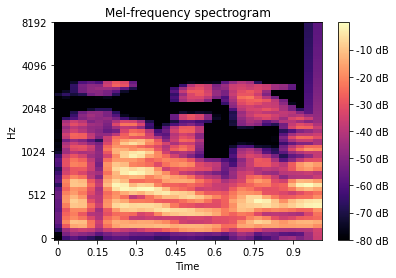

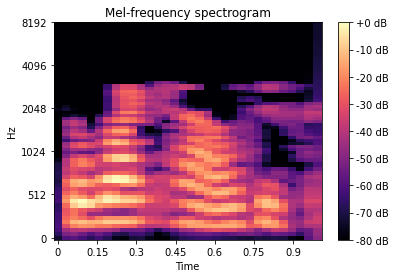

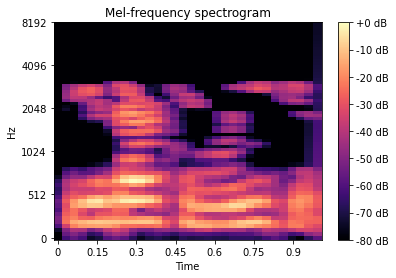

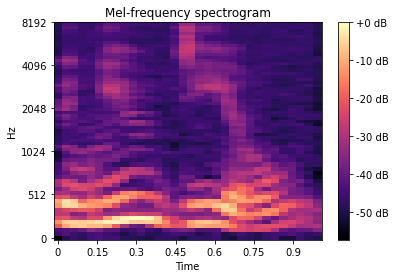

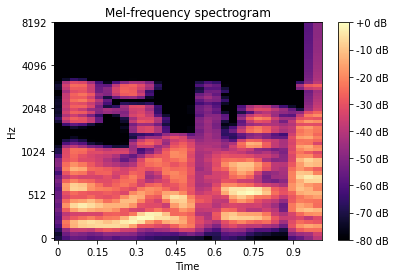

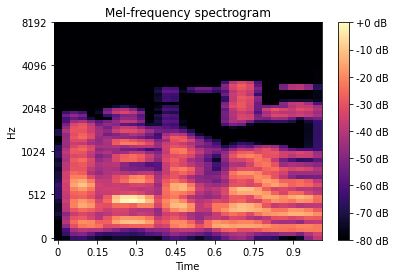

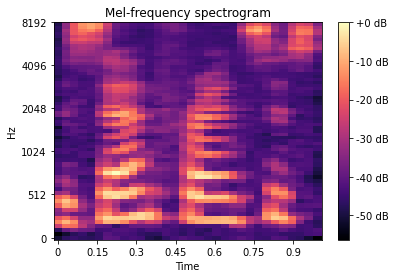

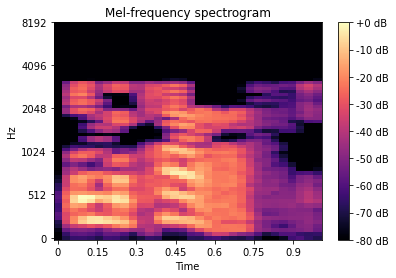

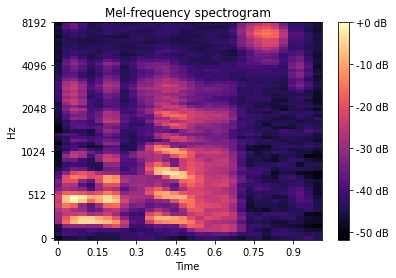

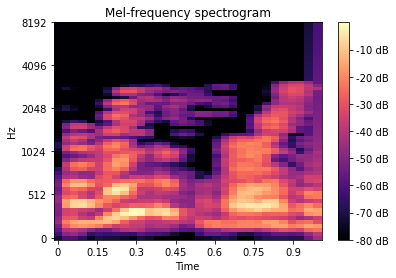

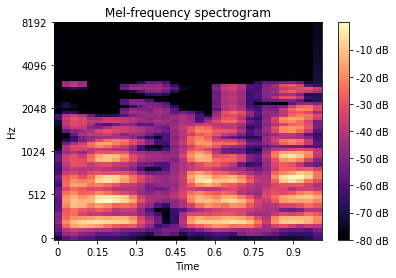

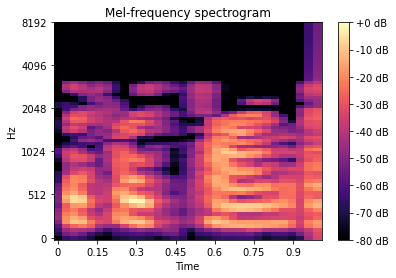

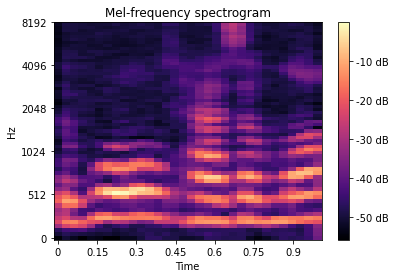

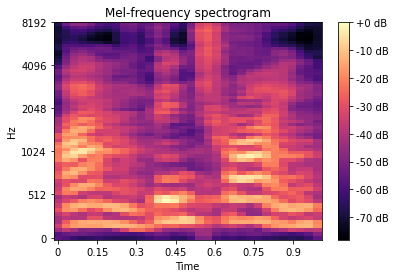

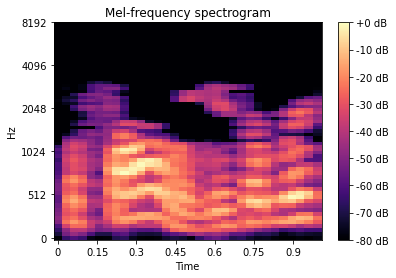

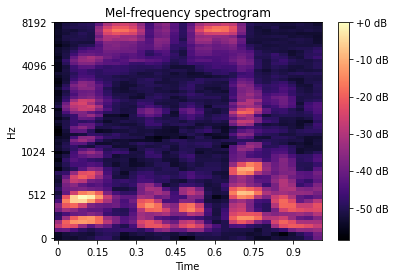

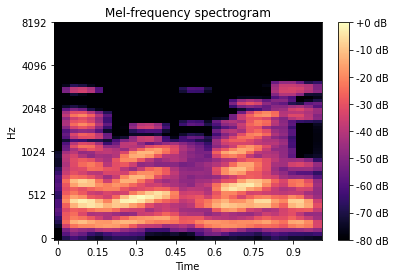

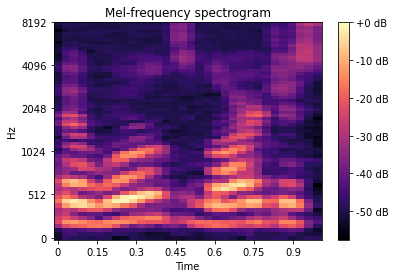

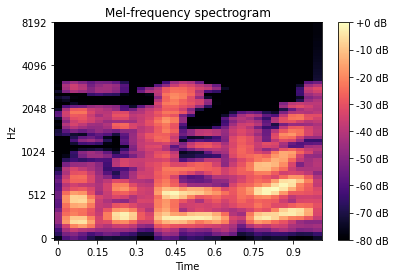

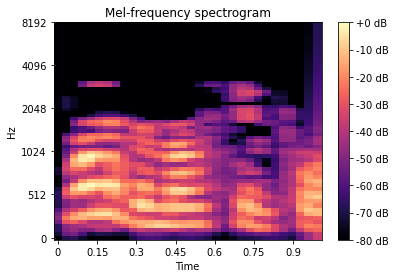

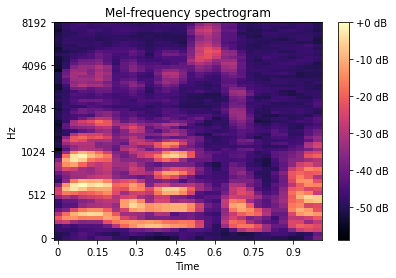

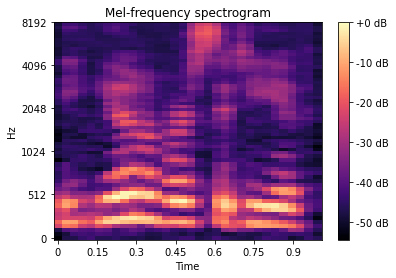

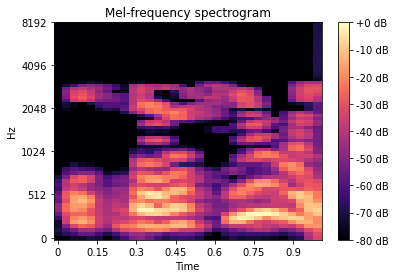

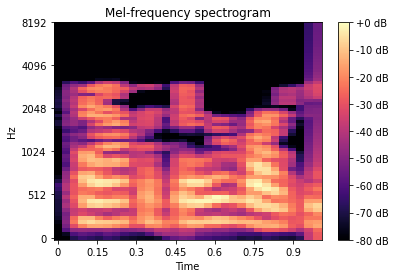

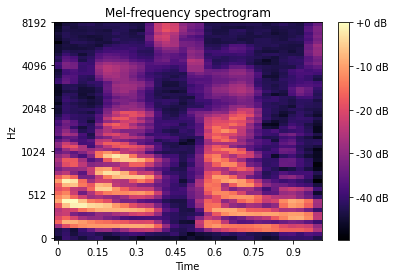

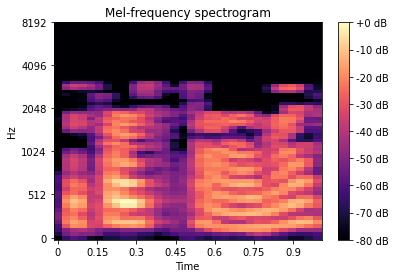

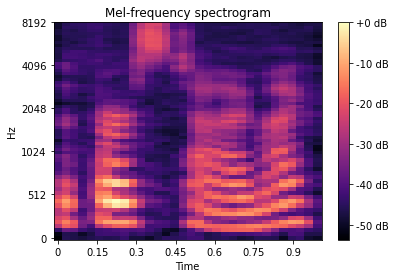

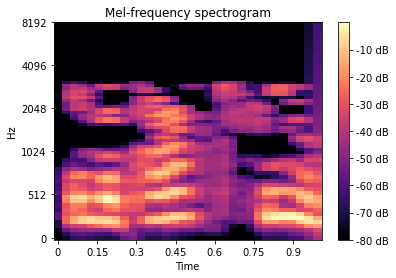

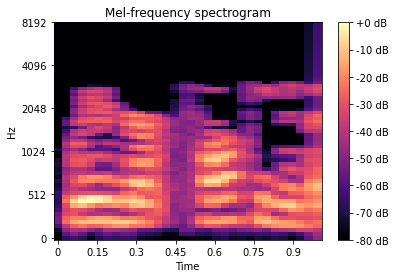

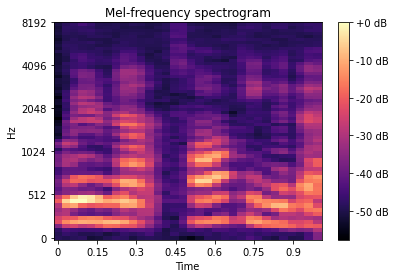

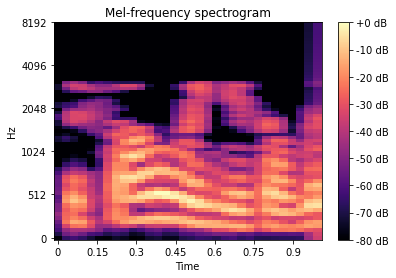

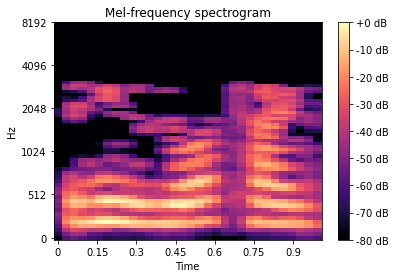

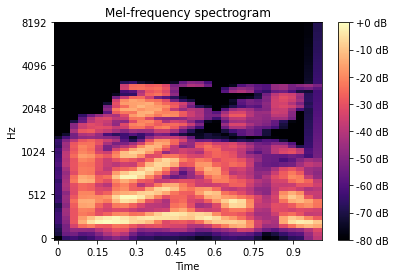

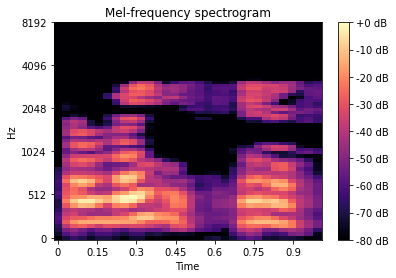

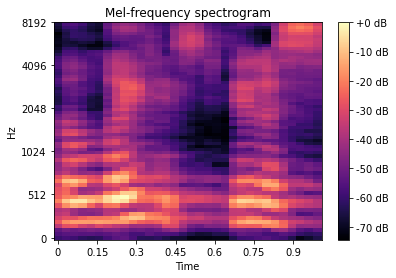

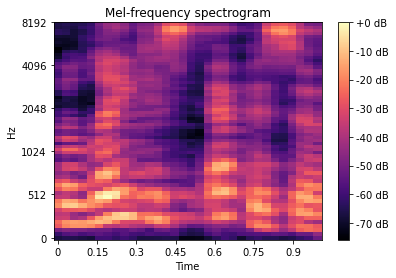

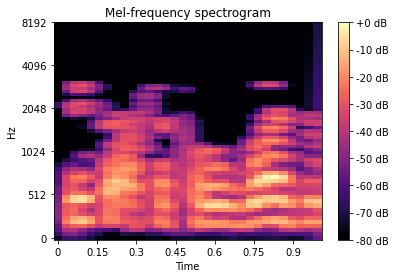

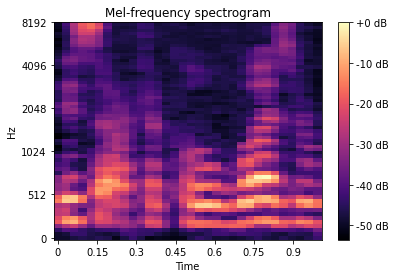

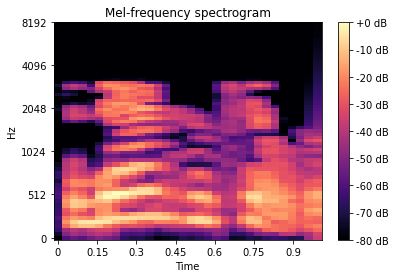

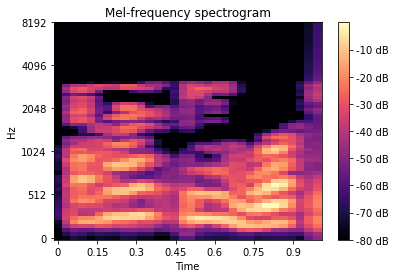

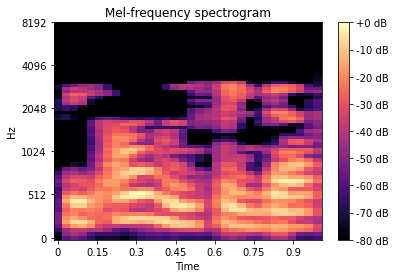

In [57]:
import librosa.display
sampling_rate = 16000
for i, filepath in enumerate(np.array(unknown_path)[no_un]):
    # fig, ax = plt.subplots()
    y, sr = librosa.load(filepath, mono=True, sr=sampling_rate)
    index_f = 0
#     for j in range(y.size // sampling_rate):
    for j in range(1):
    
        X_aug_seg = y[index_f:index_f + sampling_rate]
        X_aug_seg = np.array(X_aug_seg)
        
#         freqs, bicoh = compute_bicoherence(X_aug_seg, X_aug_seg, 16000)
#         f = plt.figure(figsize = (9, 9))
#         plt.pcolormesh(freqs, freqs, bicoh, )
#         plt.colorbar()
#         plt.clim(0, 0.5)
#         plt.show()
        
               
        S = librosa.feature.melspectrogram(y=X_aug_seg, sr=sampling_rate, n_mels=64, fmax=8000)
        # S_dB = S
        S_dB = librosa.power_to_db(S, ref=np.max)
        
        fig, ax = plt.subplots()
#         S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, x_axis='time',
                                 y_axis='mel', sr=16000,
                                 fmax=8000, ax=ax)
        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        ax.set(title='Mel-frequency spectrogram')
#         X_mel_aug.append(S_dB)
    index_f += sampling_rate

(array([ 236,  328,  399,  409,  763,  841,  852,  901,  997, 1159, 1253,
       1417, 1699, 1931, 2432, 2549, 2635, 2658, 2842, 2953, 3338, 3410,
       3523], dtype=int64),)
['./part2_full_train_4X5000/0_102_noise.wav'
 './part2_full_train_4X5000/0_483_noise.wav'
 './part2_full_train_4X5000/0_646_compressed.wav'
 './part2_full_train_4X5000/0_595_compressed.wav'
 './part2_full_train_4X5000/0_943_noise.wav'
 './part2_full_train_4X5000/0_395_noise.wav'
 './part2_full_train_4X5000/0_319_compressed.wav'
 './part2_full_train_4X5000/0_556_compressed.wav'
 './part2_full_train_4X5000/0_283_compressed.wav'
 './part2_full_train_4X5000/0_965_compressed.wav'
 './part2_full_train_4X5000/0_844_noise.wav'
 './part2_full_train_4X5000/0_676_compressed.wav'
 './part2_full_train_4X5000/0_508_noise.wav'
 './part2_full_train_4X5000/0_562_noise.wav'
 './part2_full_train_4X5000/0_189_compressed.wav'
 './part2_full_train_4X5000/0_247_noise.wav'
 './part2_full_train_4X5000/0_359_noise.wav'
 './part2_full_trai

In [81]:
print(X_test_path[yes])
tas = X_test_path[yes]
for filepath in tas:
    print(filepath)


['./part2_full_train_4X5000/1_125.wav'
 './part2_full_train_4X5000/3_127_noise.wav'
 './part2_full_train_4X5000/2_309.wav' ...
 './part2_full_train_4X5000/1_170.wav'
 './part2_full_train_4X5000/2_127_reverb.wav'
 './part2_full_train_4X5000/0_525.wav']
./part2_full_train_4X5000/1_125.wav
./part2_full_train_4X5000/3_127_noise.wav
./part2_full_train_4X5000/2_309.wav
./part2_full_train_4X5000/0_356_reverb.wav
./part2_full_train_4X5000/2_721_noise.wav
./part2_full_train_4X5000/1_99.wav
./part2_full_train_4X5000/0_672_noise.wav
./part2_full_train_4X5000/4_965_reverb.wav
./part2_full_train_4X5000/4_993_reverb.wav
./part2_full_train_4X5000/1_81_compressed.wav
./part2_full_train_4X5000/0_955.wav
./part2_full_train_4X5000/0_941_reverb.wav
./part2_full_train_4X5000/2_333_noise.wav
./part2_full_train_4X5000/4_781_compressed.wav
./part2_full_train_4X5000/4_89.wav
./part2_full_train_4X5000/1_613.wav
./part2_full_train_4X5000/2_64_reverb.wav
./part2_full_train_4X5000/3_441.wav
./part2_full_train_4X50

./part2_full_train_4X5000/0_718_compressed.wav
./part2_full_train_4X5000/1_466_reverb.wav
./part2_full_train_4X5000/1_699_noise.wav
./part2_full_train_4X5000/1_950.wav
./part2_full_train_4X5000/2_965.wav
./part2_full_train_4X5000/2_9_compressed.wav
./part2_full_train_4X5000/3_333.wav
./part2_full_train_4X5000/0_607_compressed.wav
./part2_full_train_4X5000/4_846_compressed.wav
./part2_full_train_4X5000/4_609_compressed.wav
./part2_full_train_4X5000/3_814_compressed.wav
./part2_full_train_4X5000/3_906_noise.wav
./part2_full_train_4X5000/0_663.wav
./part2_full_train_4X5000/2_16.wav
./part2_full_train_4X5000/3_782_reverb.wav
./part2_full_train_4X5000/0_814_compressed.wav
./part2_full_train_4X5000/1_255.wav
./part2_full_train_4X5000/3_341_reverb.wav
./part2_full_train_4X5000/0_374.wav
./part2_full_train_4X5000/4_674_compressed.wav
./part2_full_train_4X5000/2_32.wav
./part2_full_train_4X5000/2_22_reverb.wav
./part2_full_train_4X5000/0_777_reverb.wav
./part2_full_train_4X5000/3_457_noise.wav


['./part2_full_train_4X5000/1_125.wav'
 './part2_full_train_4X5000/3_127_noise.wav'
 './part2_full_train_4X5000/2_309.wav' ...
 './part2_full_train_4X5000/1_170.wav'
 './part2_full_train_4X5000/2_127_reverb.wav'
 './part2_full_train_4X5000/0_525.wav']
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k


<ipython-input-73-d435185453a5>:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k
k


KeyboardInterrupt: 

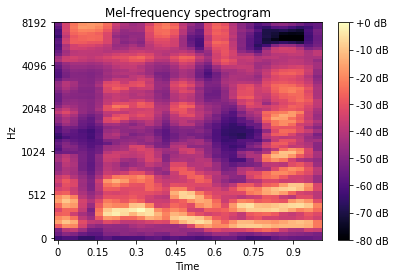

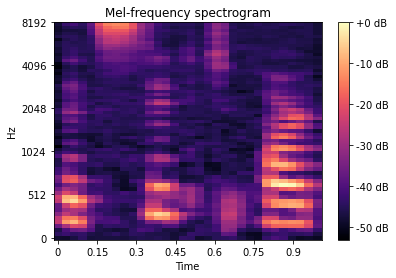

Error in callback <function flush_figures at 0x000001BA3398EA60> (for post_execute):


KeyboardInterrupt: 

In [73]:
import librosa.display
sampling_rate = 16000


for i, filepath in enumerate(X_test_path[yes]):
    print(filepath)
    # fig, ax = plt.subplots()
    y, sr = librosa.load(filepath, mono=True, sr=sampling_rate)
    index_f = 0
#     for j in range(y.size // sampling_rate):
    for j in range(1):
        print('k')
        X_aug_seg = y[index_f:index_f + sampling_rate]
        X_aug_seg = np.array(X_aug_seg)
        
#         freqs, bicoh = compute_bicoherence(X_aug_seg, X_aug_seg, 16000)
#         f = plt.figure(figsize = (9, 9))
#         plt.pcolormesh(freqs, freqs, bicoh, )
#         plt.colorbar()
#         plt.clim(0, 0.5)
#         plt.show()
        
               
        S = librosa.feature.melspectrogram(y=X_aug_seg, sr=sampling_rate, n_mels=64, fmax=8000)
        # S_dB = S
        S_dB = librosa.power_to_db(S, ref=np.max)
        
        fig, ax = plt.subplots()
#         S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, x_axis='time',
                                 y_axis='mel', sr=16000,
                                 fmax=8000, ax=ax)
        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        ax.set(title='Mel-frequency spectrogram')
#         X_mel_aug.append(S_dB)
    index_f += sampling_rate

In [ ]:
import librosa.display
sampling_rate = 16000
for i, filepath in enumerate(np.array(unknown_path)[yes_un]):
    # fig, ax = plt.subplots()
    y, sr = librosa.load(filepath, mono=True, sr=sampling_rate)
    index_f = 0
#     for j in range(y.size // sampling_rate):
    for j in range(1):
    
        X_aug_seg = y[index_f:index_f + sampling_rate]
        X_aug_seg = np.array(X_aug_seg)
        
#         freqs, bicoh = compute_bicoherence(X_aug_seg, X_aug_seg, 16000)
#         f = plt.figure(figsize = (9, 9))
#         plt.pcolormesh(freqs, freqs, bicoh, )
#         plt.colorbar()
#         plt.clim(0, 0.5)
#         plt.show()
        
               
        S = librosa.feature.melspectrogram(y=X_aug_seg, sr=sampling_rate, n_mels=64, fmax=8000)
        # S_dB = S
        S_dB = librosa.power_to_db(S, ref=np.max)
        
        fig, ax = plt.subplots()
#         S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, x_axis='time',
                                 y_axis='mel', sr=16000,
                                 fmax=8000, ax=ax)
        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        ax.set(title='Mel-frequency spectrogram')
#         X_mel_aug.append(S_dB)
    index_f += sampling_rate

In [32]:
def compute_bicoherence(s1, s2, rate=16000, nperseg=1024, noverlap=512):
    """ Compute the bicoherence between two signals of the same lengths s1 and s2
    using the function scipy.signal.spectrogram
    """
    from scipy import signal
    import numpy
    # compute the stft
    f1, t1, spec_s1 = signal.spectrogram(s1, fs = rate, nperseg = nperseg, noverlap = noverlap, mode = 'complex',)
    f2, t2, spec_s2 = signal.spectrogram(s2, fs = rate, nperseg = nperseg, noverlap = noverlap, mode = 'complex')

    # transpose (f, t) -> (t, f)
    spec_s1 = numpy.transpose(spec_s1, [1, 0])
    spec_s2 = numpy.transpose(spec_s2, [1, 0])
    print(spec_s1.shape)
    # compute the bicoherence
    arg = numpy.arange(f1.size / 2)
    print(arg)
    sumarg = arg[:, None] + arg[None, :]
    num = numpy.abs(
        numpy.mean(spec_s1[:, arg, None] * spec_s1[:, None, arg] * numpy.conjugate(spec_s2[:, sumarg]), 
        axis = 0)
        ) ** 2
    denum = numpy.mean(
        numpy.abs(spec_s1[:, arg, None] * spec_s1[:, None, arg]) ** 2, axis = 0) * numpy.mean(
            numpy.abs(numpy.conjugate(spec_s2[:, sumarg])) ** 2, 
            axis = 0)
    bicoh = num / denum
    return f1[arg], bicoh


sampling_rate = 16000
for i, filepath in enumerate(X_test_path[:1]):
    # fig, ax = plt.subplots()
    y, sr = librosa.load(filepath, mono=True, sr=sampling_rate)
    index_f = 0
    for j in range(y.size // sampling_rate):
        X_aug_seg = y[index_f:index_f + sampling_rate]
        X_aug_seg = np.array(X_aug_seg)
        
        freqs, bicoh = compute_bicoherence(X_aug_seg, X_aug_seg, 16000)
        f = plt.figure(figsize = (9, 9))
        plt.pcolormesh(freqs, freqs, bicoh, )
        plt.colorbar()
        plt.clim(0, 0.5)
        plt.show()
        
               
        S = librosa.feature.melspectrogram(y=X_aug_seg, sr=sampling_rate, n_mels=self.n_mels, fmax=8000)
        # S_dB = S
        S_dB = librosa.power_to_db(S, ref=np.max)
        
        fig, ax = plt.subplots()
#         S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, x_axis='time',
                                 y_axis='mel', sr=sr,
                                 fmax=8000, ax=ax)
        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        ax.set(title='Mel-frequency spectrogram')
        
        X_mel_aug.append(S_dB)


        # y_labels_aug.append(self.labels[i])

        index_f = index_f + sampling_rate
    self.file_split_num.append(j + 1)
    #         X_aug_seg = np.expand_dims(X_aug_seg, axis=0)
    #         X_aug.append(X_aug_seg)
# X_aug = np.concatenate(X_aug,axis = 0)

X_split = np.array(X_mel_aug)


# # exemple of use and display
# freqs, bicoh = compute_bicoherence(s1, s2, rate)
# f = plt.figure(figsize = (9, 9))
# plt.pcolormesh(freqs, freqs, bicoh, 
#     # cmap = 'inferno'


(30, 513)
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 1

IndexError: arrays used as indices must be of integer (or boolean) type

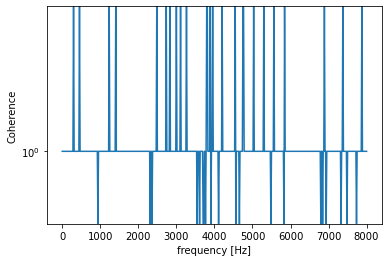

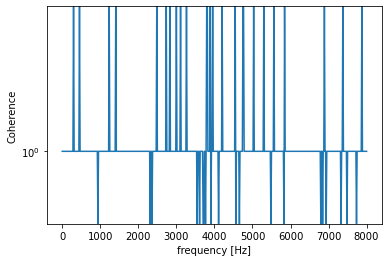

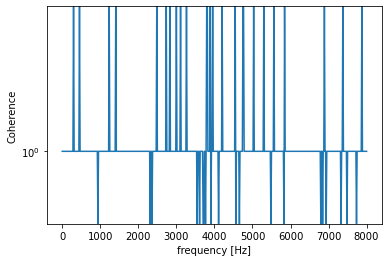

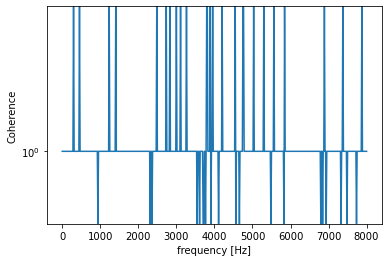

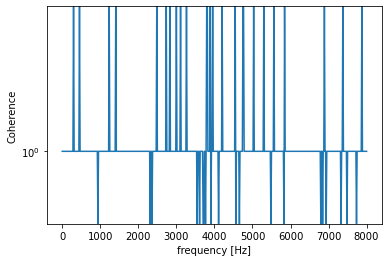

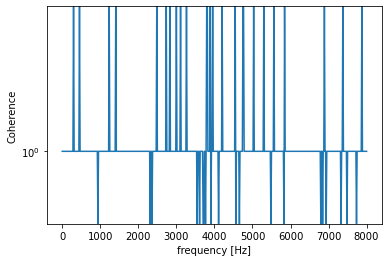

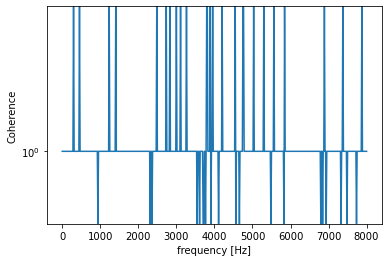

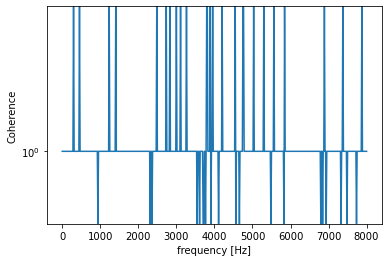

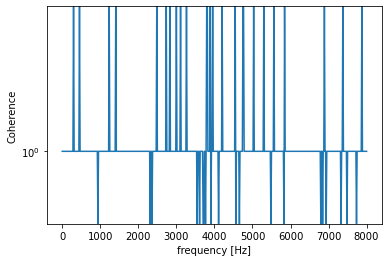

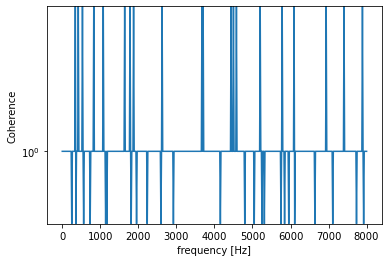

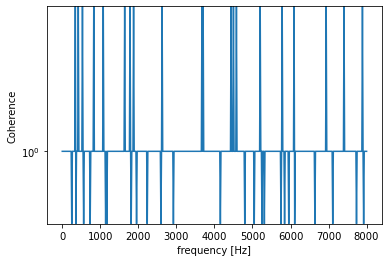

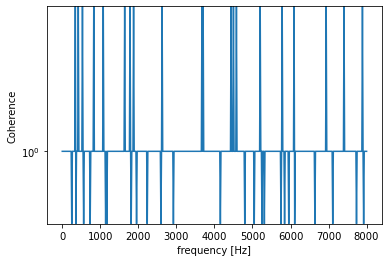

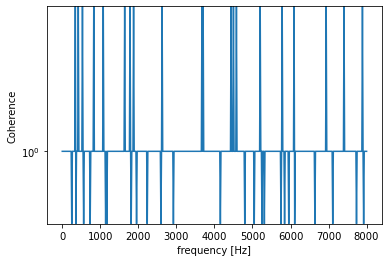

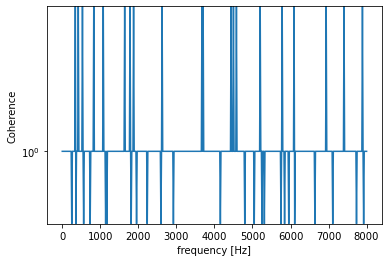

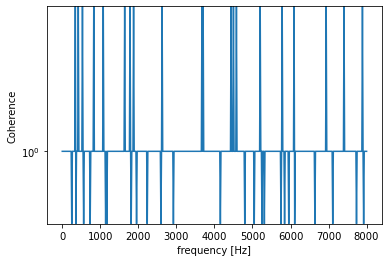

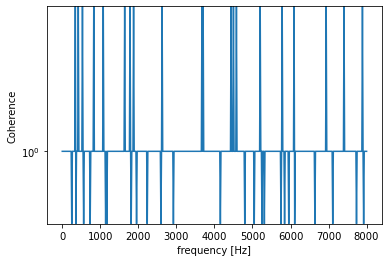

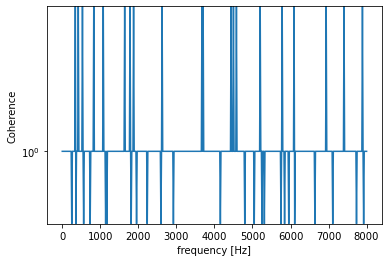

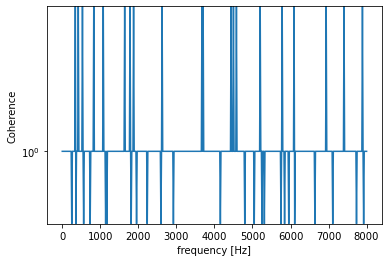

In [46]:
from scipy import signal

file_split_num=[]


sampling_rate = 16000
for i, filepath in enumerate(X_test_path[:2]):
    # fig, ax = plt.subplots()
    y, sr = librosa.load(filepath, mono=True, sr=sampling_rate)
    index_f = 0
    for j in range(y.size // sampling_rate):
        X_aug_seg = y[index_f:index_f + sampling_rate]
#         X_aug_seg = np.array(X_aug_seg)

#         f1, t1, X_aug_seg = signal.spectrogram(X_aug_seg, fs = 16000 , nperseg = 1024, noverlap = 512, mode = 'complex',)
        n = len(X_aug_seg)
        Y = np.fft.fft(y) 				# fft computing and normalization
        Y = np.abs(Y[range(int(n/2))])
#         plt.plot(Y)
        
        f, Cxy = signal.coherence(Y, Y, 16000, nperseg=1024)
        
#         f, Cxy = signal.coherence(X_aug_seg, X_aug_seg, 16000, nperseg=1024)
        plt.semilogy(f, Cxy)
        plt.xlabel('frequency [Hz]')
        plt.ylabel('Coherence')
        plt.show()

               
#         S = librosa.feature.melspectrogram(y=X_aug_seg, sr=sampling_rate, n_mels=self.n_mels, fmax=8000)
#         # S_dB = S
#         S_dB = librosa.power_to_db(S, ref=np.max)
#         X_mel_aug.append(S_dB)


        # y_labels_aug.append(self.labels[i])

        index_f = index_f + sampling_rate
    file_split_num.append(j + 1)
    #         X_aug_seg = np.expand_dims(X_aug_seg, axis=0)
    #         X_aug.append(X_aug_seg)
# X_aug = np.concatenate(X_aug,axis = 0)

# X_split = np.array(X_mel_aug)

In [ ]:
f, Cxy = signal.coherence(x, y, fs, nperseg=1024)
plt.semilogy(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.show()